#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions).

# <font color=red>DSP.05 Computing Magnitude and Phase </font>

# <font color=red>BASICS</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

#unknown magnitudes, frequencies and phases
unknownfreq1 = 3
unknownmag1 = 5
unknownphase1 = np.pi/4
 
unknownfreq2 = 2
unknownmag2 =5
unknownphase2 = np.pi/2
 
unknownfreq3= 4
unknownmag3 = 8
unknownphase3 = 0

## <font color=red>DSP.05.B1) Multiplying Waves of the Same Frequency but Different Phase</font>

### <font color=red>DSP.05.B1.a) A Short Review - Waves of the Same Frequency</font>

Run the code to multiply two 8 Hz sine waves. The 2 waveforms being multiplied have the same frequency and phase but are different magnitudes: the first is 5 times larger than the second. 

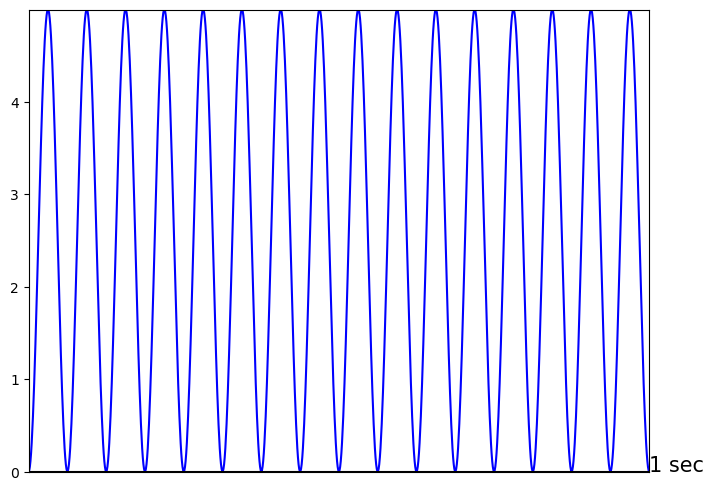

In [2]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 8

timeseries = 5 * np.sin(2*np.pi * freq * time) * np.sin(2*np.pi * freq * time) # (5 * sin(2𝜋 * 8 * time)) * sin(2𝜋 * 8 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

As you already know: because the two multiplied sine waves are the same frequency and are in phase, the mean is nonzero. 
    
Integrate the timeseries over the 1 second interval and then divide by 0.5 seconds to calculate
the magnitude of 8 Hz activity (dividing by 1 second would calculate mean activity). This is one way to quantify how much energy there is in the waveform. (If you haven't had or don't remember calculus, in this context "integrate" means compute the area under the curve relative to the zero line.)

In [3]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x) * np.sin(2*np.pi * freq * x)

quad(integrand, 0, 1)[0] / 0.5

5.0

As shown in the above code, the 8 Hz sine wave was multiplied by 5.

Take a look at the individual waveforms to see what is happening.

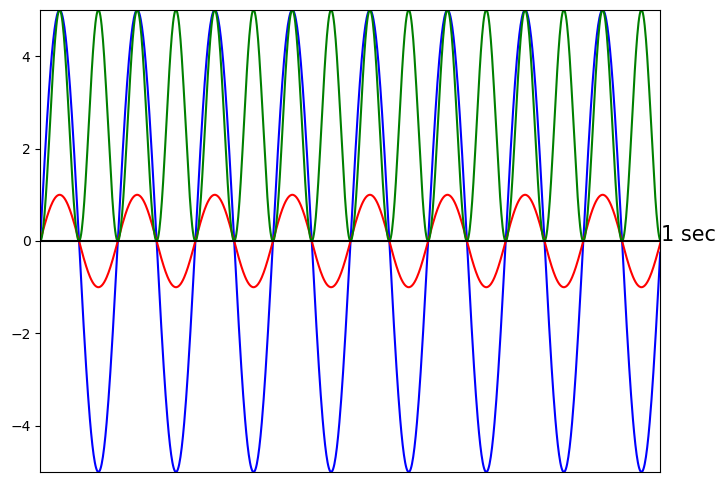

In [4]:
time = np.arange(0,1,0.001)
freq = 8

B = 5 * np.sin(2*np.pi * freq * time) #The 8 Hz sine wave with a gain of 5 
R = np.sin(2*np.pi * freq * time) #The 8 Hz sine wave with a gain of 1 (i.e., no change from default)
G = 5 * np.sin(2*np.pi * freq * time) * np.sin(2*np.pi * freq * time) #8 Hz sine wave with a gain of 5 X a 8 Hz sine wave

make_plot_3(time,B,"blue",time,R,"red",time,G,"green")
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The product is shown in green. To obtain the green waveform, the two sine waves were multiplied,
sample-by-sample, across time. For example, at $π$/2 (90°), the max of one sine wave was multiplied by
the max of the second sine wave (5 × 1 = 5). This computed the maximum peak in the green waveform.
All multiplied values range between a low of 0 and a high of 5. Note that, because the sine waves
were always in phase, when one was negative the other was negative, so the product was never negative.

### <font color=red>DSP.05.B1.b) Multiplying Sine Waves of the Same Frequency but Different Phase</font>

Stay with the example above, but this time add a 45 degree phase shift  to the first sine wave. Recall that a 45 degree phase shift is $π$/4 radians, which is 1/8 of a cycle, since one complete cycle is 2$π$ radians.

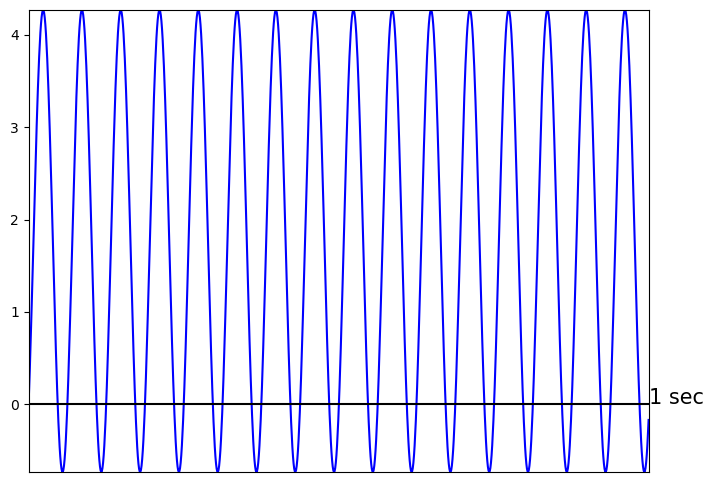

In [5]:
time = np.arange(0,1,0.001)
freq = 8

timeseries = 5 * np.sin(2*np.pi * freq * time + np.pi/4) * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Integrate the timeseries over the 1 second interval and then divide by 0.5 seconds to calculate
the magnitude of 8 Hz activity (dividing by 1 second would calculate mean activity).  

In [6]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi/4) * np.sin(2*np.pi * freq * x)

quad(integrand, 0, 1)[0] / 0.5

3.5355339059327395

Although the magnitude value is still non-zero, it doesn't match the magnitude value we got when there was no phase difference: 5 (no phase
shift) versus 3.54 (phase shift).
    
What is going on?

Answer: Take a look at the individual waveforms.

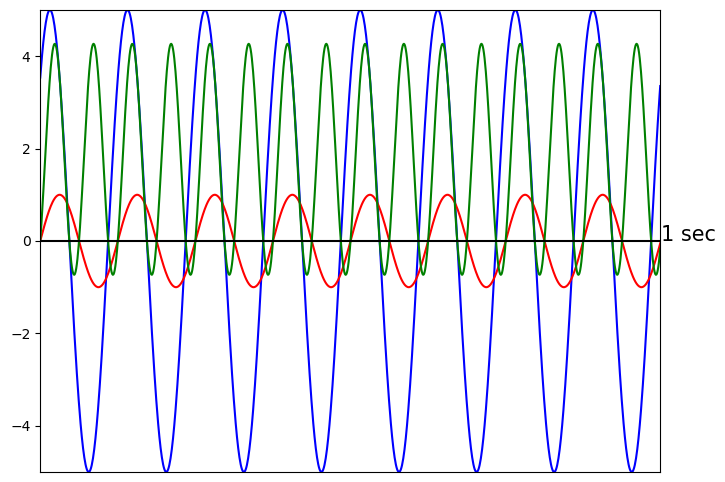

In [7]:
time = np.arange(0,1,0.001)
freq = 8

B = 5 * np.sin(2*np.pi * freq * time+ np.pi/4) #The 8 Hz sine wave with a 45 degree phase shift and a gain of 5
R = np.sin(2*np.pi * freq * time) #8 Hz sine wave with no gain or phase shift
G = 5 * np.sin(2*np.pi * freq * time+ np.pi/4) * np.sin(2*np.pi * freq * time) #8 Hz sine wave with a 45 degree phase shift and a gain of 5 X a 8 Hz sine wave

make_plot_3(time,B,"blue",time,R,"red",time,G,"green")
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The blue and red waves are the two constituent signals. The wave resulting from their multiplication (green) is similar to that obtained for the non-shifted sine wave, except that it's shifted
down a small amount. As a result, the magnitude and mean values when the original sine wave is
phase-shifted compared to the 'probe' (the second signal) are less than the magnitude and mean values when the
original and 'probe' waves are in phase. As a result, the correct magnitude value (5 in this example)
is not calculated.

To obtain the correct magnitude value, one possibility is to change the phase of the 'probe' sine wave,
iteratively searching through lots of different phase values to identify phase that produces the largest magnitude value.

We happen to know that the phase shift of the first signal is 45 degrees. Modify the code so the 'probe' sine wave (still with
unity gain) has the same 45 degree phase shift.

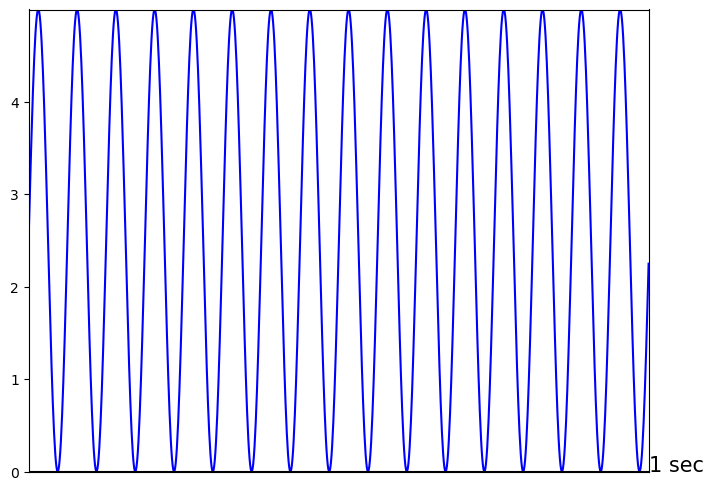

In [8]:
time = np.arange(0,1,0.001)
freq = 8

timeseries = 5 * np.sin(2*np.pi * freq * time + np.pi/4) * np.sin(2*np.pi * freq * time+ np.pi/4)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude.

In [10]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi/4) * np.sin(2*np.pi * freq * x+ np.pi/4)

round(quad(integrand, 0, 1)[0] / 0.5)

5

That works. The magnitude value is now correctly calculated.

### <font color=red>DSP.05.B1.c) An Alternative to Changing the Phase</font>

Here is the product of an 8 Hz timeseries with a phase shift and a 'probe' sine wave with unity gain and no phase shift.

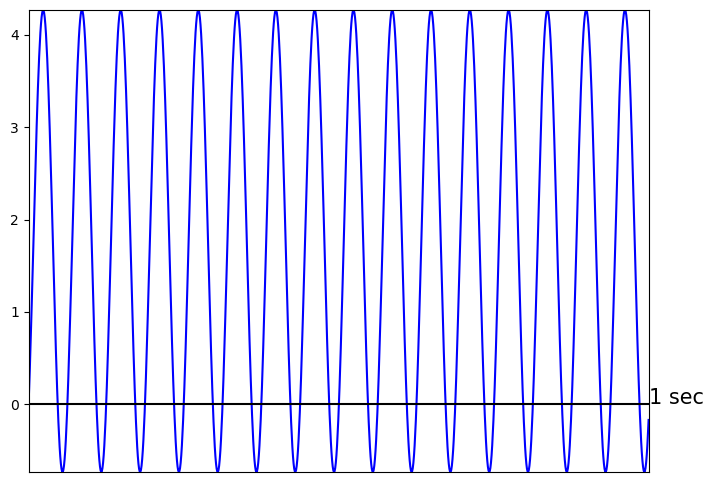

In [865]:
time = np.arange(0,1,0.001)
freq = 8

timeseries = 5 * np.sin(2*np.pi * freq * time + np.pi/4) * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Lately we've been talking just about sine waves, but earlier we discussed modeling signals as a combination of sine and cosine waves. You'll recall that we can think of a cosine wave as a sine wave shifted by $π$/2 radians (90°). Treating sine waves and cosine waves as separate building blocks will simplify something we want to do shortly. First, we'll calculate the magnitude of the sine part of a waveform. (In a moment, we'll refer to the sine part of the signal as 'a'.)

In [866]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi/4) * np.sin(2*np.pi * freq * x)

a = quad(integrand, 0, 1)[0] / 0.5
a

3.5355339059327395

Because of the phase shift, this magnitude value is not the magnitude value in the original sine wave.
Instead of iteratively changing the phase of the second sine wave until the largest value is obtained, is
there a simpler method?

Answer:
    
Recall this trigonometric identity, based on the Pythagorean Theorem:  $sin^2\theta + cos^2\theta = 1$ .

This trigonometric identity indicates that our taking a second measurement with a 'probe' cosine wave will provide the remaining magnitude information. So, in the next code cell, instead of mulitplying the original sine wave signal by a 'probe' sine wave, we'll multiply the original sive wave signal by a 'probe' cosine wave.

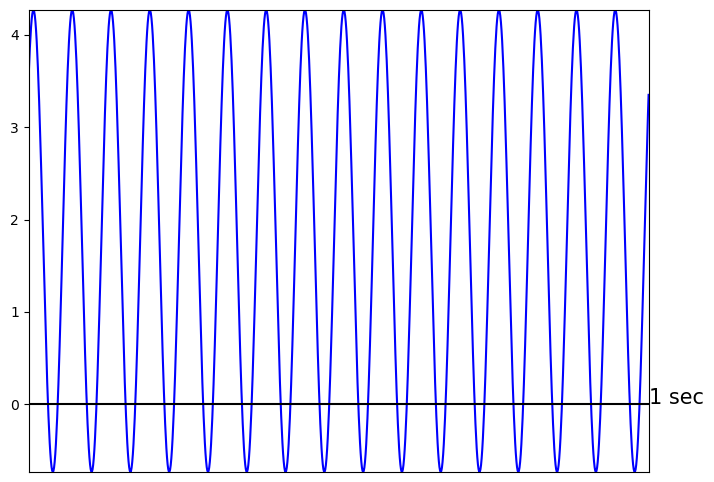

In [867]:
time = np.arange(0,1,0.001)
freq = 8

timeseries = 5 * np.sin(2*np.pi * freq * time + np.pi/4) * np.cos(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of the cosine part (in a moment we'll refer to the cosine part as 'b').

In [868]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi/4) * np.cos(2*np.pi * freq * x)

b = quad(integrand, 0, 1)[0] / 0.5
b

3.535533905932736

To calculate the magnitude of 8 Hz activity, recall the Pythagorean formula $a^2 + b^2 = c^2$ .

To solve for c, calculate $\sqrt{a^2 + b^2}  (= \sqrt{sin^2 θ + cos^2 θ })$.

In [869]:
round(np.sqrt(a**2 + b**2))

5

As expected, the magnitude value is 5. So, now we have a way to recover the full magnitude. The trick is to use separate sine and cosine building blocks to handle the possibility of a phase difference between the original waveforms. This strategy gives us the full magnitude right away, instead of our having to try lots of phase shifts to find the maximum.

### <font color=red>DSP.05.B1.d) An Alternative to Changing the Phase - a Second Example</font>

Here is an example with a sine wave signal with a phase offset of $π$/2 radians (90°), multiplied with our original 'probe" sine wave.

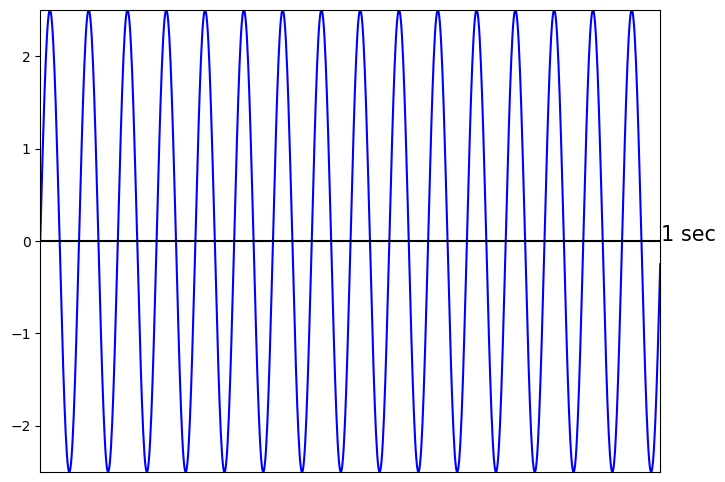

In [870]:
time = np.arange(0,1,0.001)
freq = 8

timeseries = 5 * np.sin(2*np.pi * freq * time + np.pi/2) * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude.

In [871]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi/2) * np.sin(2*np.pi * freq * x)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

-0.0

The magnitude value is zero. What happened to all the energy in the original sine wave signal? What is going on?

Answer:
    
Take a look at the individual waveforms.

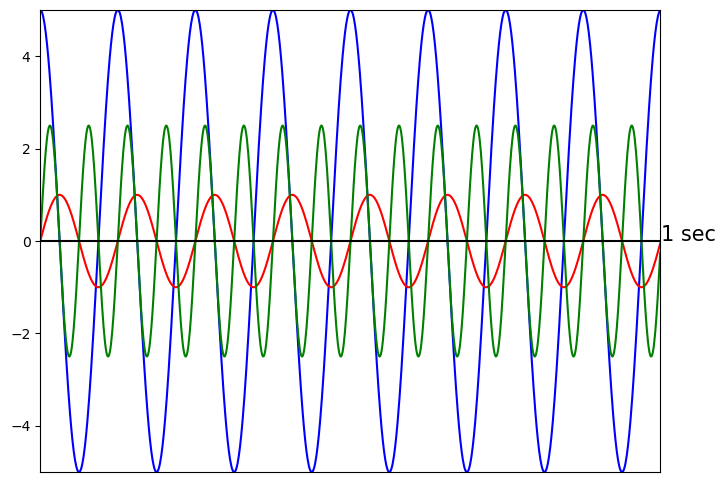

In [872]:
time = np.arange(0,1,0.001)
freq = 8

B = 5 * np.sin(2*np.pi * freq * time+ np.pi/2) #8 Hz sine wave with a 90 degree phase shift and a gain of 5
R = np.sin(2*np.pi * freq * time) #8 Hz sine wave with no gain or phase shift
G = 5 * np.sin(2*np.pi * freq * time+ np.pi/2) * np.sin(2*np.pi * freq * time) #8 Hz sine wave with a 90 degree phase shift and a gain of 5 X a 


make_plot_3(time,B,"blue",time,R,"red",time,G,"green")
plt.text(1,0,'1 sec',fontsize=15)
plt.show()


Because of a phase shift of $π$/2 radians (90°) in the original (blue) sine wave signal, the green timeseries resulting from the multiplication with the 'probe' is centered symmetrically about the x axis. (A 180-degree phase shift would flip the sine wave but would still be centered symmetrically about the x axis.) As a result, the mean value is zero: because activity oscillates symmetrically above and
below the x axis, the magnitude value is zero.

Instead of iteratively changing the phase in the second 'probe' sine wave until the largest magnitude
value is obtained, can you think of a more elegant method?

Answer:
    
Recall this trigonometric identity: $sin^2 θ + cos^2 θ = 1$ .
    
This trigonometric identity indicates that, if we take a second measurement with a 'probe' cosine wave,
the remaining 8 Hz activity will be measured. In particular, because the sine and cosine functions are
complementary, in the present case, where multiplying by the Sin[8x] timeseries didn't 'pick up' any activity, multiplying by Cos[8x] 'picks up' the total magnitude value. What helps this work is that
sine and cosine functions at the same frequency and phase are uncorrelated. That means that the
cosine function is in a great position to align with activity that is uncorrelated with the sine function. (Viewed in a statistical framework, they're positioned to correlated with, and represent, distinct sources of variance.)

Take a measurement of the magnitude with a 'probe' cosine wave.

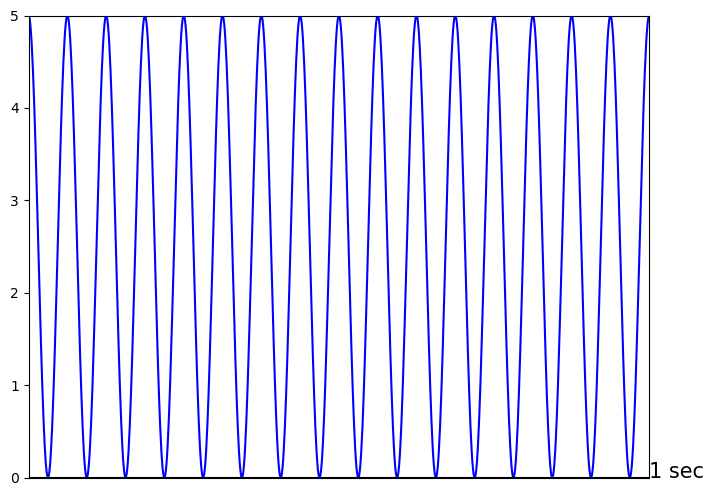

In [873]:
time = np.arange(0,1,0.001)
freq = 8

timeseries = 5 * np.sin(2*np.pi * freq * time + np.pi/2) * np.cos(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of the cosine part.

In [874]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi/2) * np.cos(2*np.pi * freq * x)

b = quad(integrand, 0, 1)[0] / 0.5
round(b,5)

5.0

A magnitude value of 5. Just what we expected.

### <font color=red>DSP.05.B1.e) An Alternative</font>

Obtain a measure of the magnitude of the original timeseries using 'probe' sine and then cosine
components.

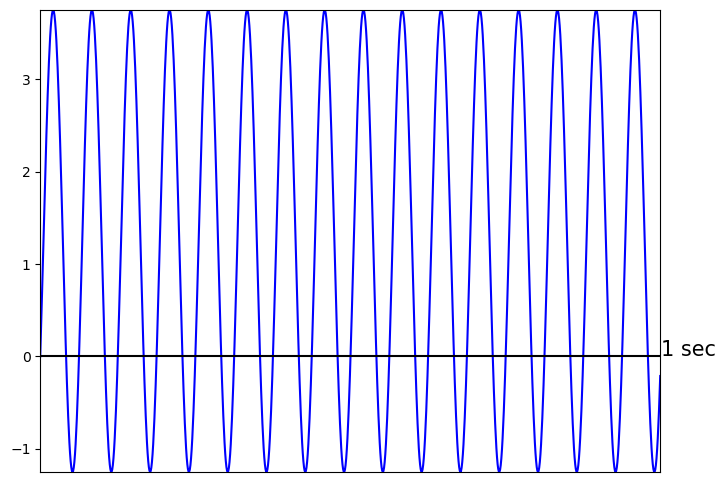

In [875]:
time = np.arange(0,1,0.001)
freq = 8

timeseries = 5 * np.sin(2*np.pi * freq * time + np.pi/3) * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of the sine component. 

In [876]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi/3) * np.sin(2*np.pi * freq * x)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

2.5

Calculate the magnitude of the cosine component.

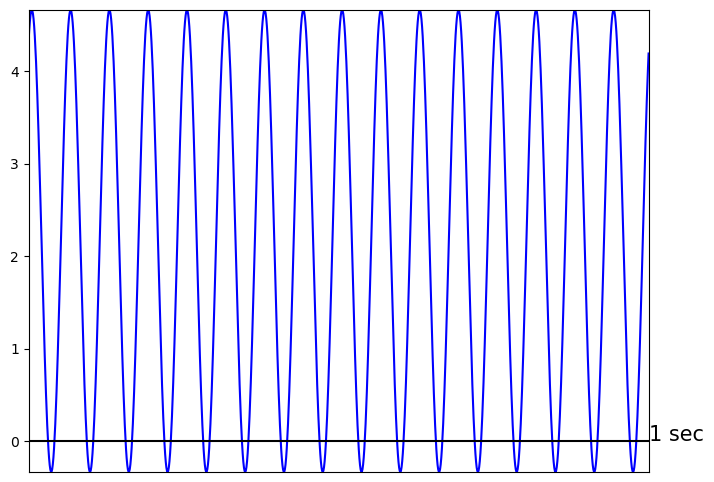

In [877]:
time = np.arange(0,1,0.001)
freq = 8

timeseries = 5 * np.sin(2*np.pi * freq * time + np.pi/3) * np.cos(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

In [878]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi/3) * np.cos(2*np.pi * freq * x)

b = quad(integrand, 0, 1)[0] / 0.5
round(b,5)

4.33013

To obtain the needed magnitude value, turn once again to the formula $a^2 + b^2 = c^2$ .
To solve for c, calculate $\sqrt{a^2 +b^2} = \sqrt{sin^2 θ + cos^2 θ })$.

In [879]:
round(np.sqrt(a**2 + b**2))

5

Checks out.

Here is a question...

Is it possible to work backwards - to calculate the phase using the above sinepart and cosinepart
measures?

Answer: Look at this plot. (Recall some trigonometry terms: First, the value of the sine of an angle is the length of the opposite side of a triangle divided by the length of the hypoteneuse. Second, the value of the cosine of an angle is the length of the adjacent side of a triangle divided by the length of the hypoteneuse. Third, the tangent of an angle is the length of the opposite side of a triangle divided by the length of the adjacent side. Fourth, to compute what's called the arctan, you want to determine the angle that creates a given tangent value - you could call that angle the arc that produces a given tangent value.) 

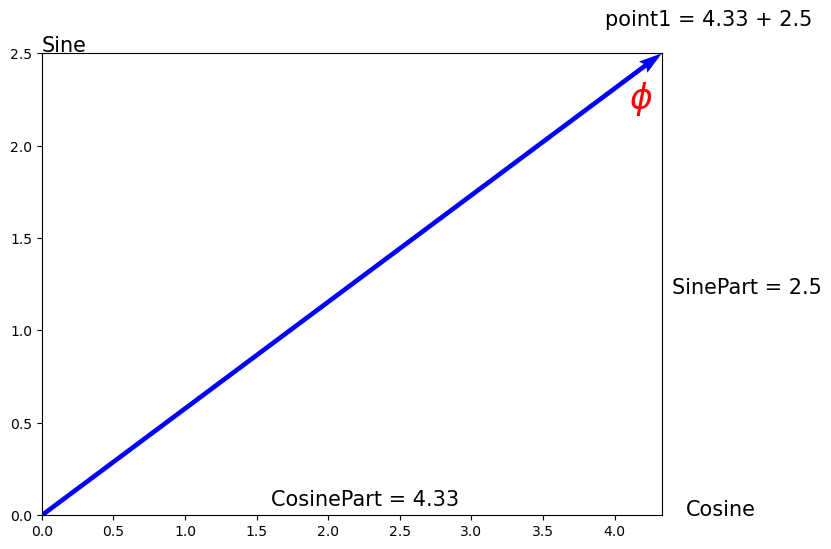

In [880]:
plt.quiver(0, 0, 4.33, 2.5, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.xlim(0, 4.33)
plt.ylim(0, 2.5)
plt.text(4.33 - 0.4, 2.5 + 0.15,'point1 = 4.33 + 2.5',fontsize=15)
plt.text(4.5,0,'Cosine',fontsize=15)
plt.text(0,2.51,'Sine',fontsize=15)
plt.text(1.6,0.05,'CosinePart = 4.33',fontsize=15)
plt.text(4.4,1.2,'SinePart = 2.5',fontsize=15)
plt.text(4.1,2.2,'$\phi$',fontsize=25,color='r')
plt.show()

The arrow shows a vector created from the sinepart and cosinepart values - defined as {cosinepart,
sinepart}, providing the x length and the y length. This is Pythagoras at work.

Take a look at this trigonometric identity: A Cos x + B Sin x = $\sqrt{A^2 + B^2} Sin (x + ArcTan \frac{A}{B} )$ .
    
This tells us that our sinepart and cosinepart values can be expressed in terms of a sine wave with a magnitude ($\sqrt{A^2 + B^2}$ ) and with a phase offset of ArcTan (A/B). This phase value corresponds to the angle ϕ in the above plot. Thus, computing the phase of the above timeseries is the same as computing
the angle ϕ that this vector forms with respect to the y axis, computed as ArcTan[ Cosinepart/Sinepart ] .The computed phase value is the phase you would add to a sine wave to get the correct phase offset.

So, to answer our questions above: yes, it's possible to work backwards - to calculate the phase using the sinepart and cosinepart
measures.

Calculate ArcTan[ Cosinepart/Sinepart ] .

In [881]:
phaseradians = round(np.arctan(b/a),4)
phaseradians

1.0472

The phase is 1.0472 radians.

Don't like radians? Convert to degrees.

In [882]:
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

60.0

The original timeseries is 5 * Sin[5 x 2$π$ + $π$/3 ] . Yup - a 60° phase shift. (Let's check this: 60° is 1/6th of 360°. 360° is 2$π$. 1/6th of 2$π$ is 2$π$/6 = $π$/3. So, our putting "+ $π$/3" in the Sin command shifts the sine wave by 360°/6 = 60°.) 

### <font color=red>DSP.05.B1.f) An Alternative to Calculating the Phase - a Final Example</font>

Obtain a measure of the phase of the original timeseries using 'probe' sine and then cosine components.

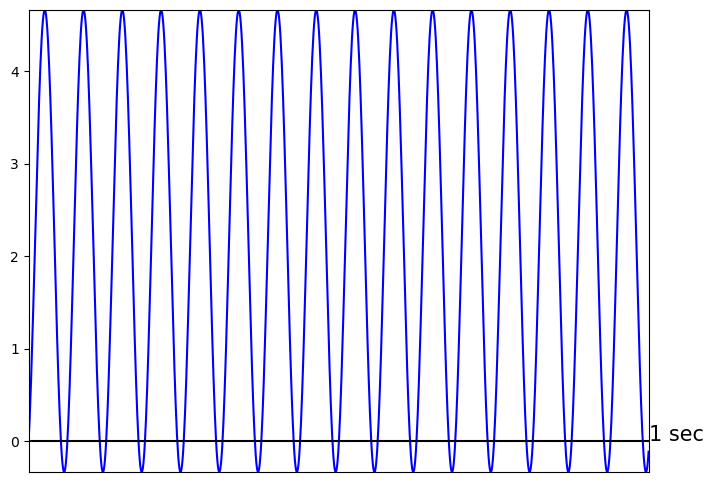

In [13]:
time = np.arange(0,1,0.001)
freq = 8

timeseries = 5 * np.sin(2*np.pi * freq * time + np.pi/6) * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of the sine component.

In [15]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi/6) * np.sin(2*np.pi * freq * x)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

4.33013

Calculate the magnitude of the cosine component. 

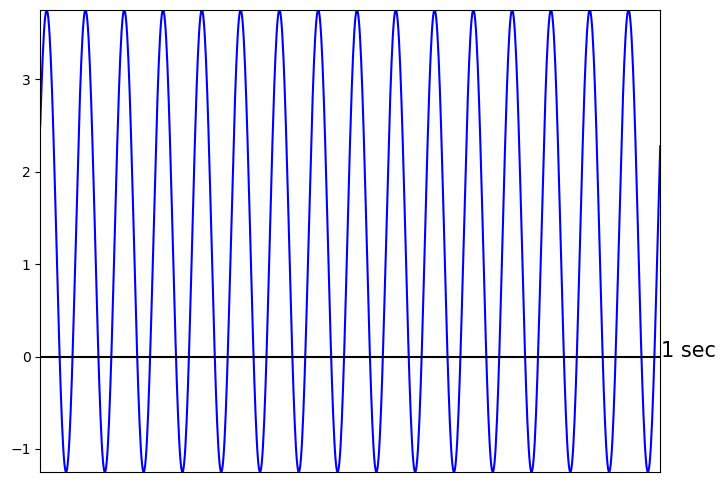

In [16]:
time = np.arange(0,1,0.001)
freq = 8

timeseries = 5 * np.sin(2*np.pi * freq * time + np.pi/6) * np.cos(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

In [17]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi/6) * np.cos(2*np.pi * freq * x)

b = quad(integrand, 0, 1)[0] / 0.5
round(b,5)

2.5

To obtain the needed magnitude value, turn once again to the formula $a^2 + b^2 = c^2$ .
To solve for c, calculate $\sqrt{a^2 +b^2} = \sqrt{sin^2 θ + cos^2 θ })$.

In [18]:
round(np.sqrt(a**2 + b**2))

5

To obtain the phase value, calculate the phase as ArcTan[ Cosinepart/Sinepart ] .

In [19]:
phaseradians = round(np.arctan(b/a),5)
phaseradians

0.5236

The phase is 0.524 radians.

Don't like radians? Convert to degrees. [#Miller The equation near the end of B1.e was: phasedegrees = round(phaseradians * 180 / np.pi,2). The equation here near the end of B1.f is: phasedegrees = round(phaseradians * 180 / np.pi,1). Why the difference in the last argument: 2 vs. 1? The '1' argument is used later as well.]

In [22]:
phasedegrees = round(phaseradians * 180 / np.pi)
phasedegrees

30

Yup - checks out.

## <font color=red>DSP.05.B2) Obtaining the Magnitude and Phase of a Timeseries Containing Two Sine Waves</font>

### <font color=red>DSP.05.B2.a) Probing a Timeseries</font>

The examples in B.1 indicate that, by multiplying a timeseries with a sine 'probe' and then a cosine 'probe' of a given
frequency, magnitude and phase measures of activity in the original timeseries at the 'probe' frequency
are obtained. It stands to reason that, if we encountered a timeseries of unknown frequency(ies), the
procedures outlined above could be used to determine the unknown frequency(ies) and their associated magnitude
and phase values. Consider: if the unknown frequency(ies) aren’t what we probe with, we’ll turn up
zero magnitude. If we probe with a frequency that’s present in the unknown signal, we’ll identify
that frequency and its phase. Give it a try.

Start with an example where we know the answer - a 3 Hz sine wave (amplitude = 8 units and phase
shift = 45 degrees). Assume the frequency is unknown, and start by multiplying the observed sine wave
timeseries by a 1 Hz 'probe' sine function.

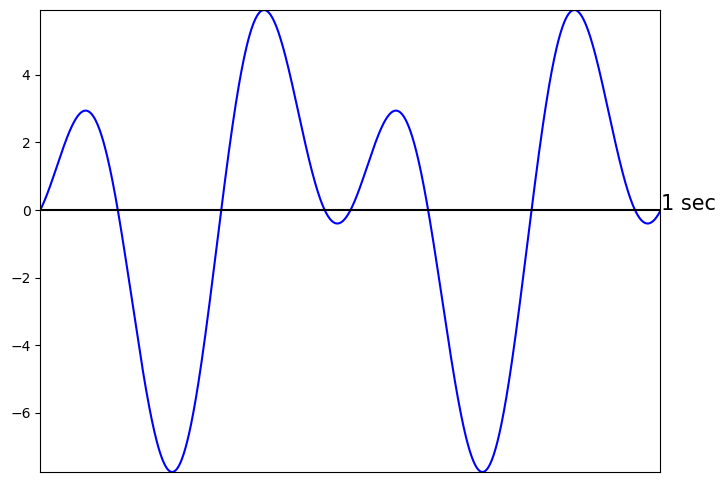

In [890]:
time = np.arange(0,1,0.001)
freq = 3

timeseries = 8 * np.sin(2*np.pi * freq * time + np.pi/4) * np.sin(2*np.pi * 1 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The plot shows the product of the 3 Hz sine wave and 1 Hz sine wave. In terms of magnitude, the waveform appears to be
symmetric about the x axis.

Calculate the 1 Hz sine magnitude component.

In [891]:
from scipy.integrate import quad

def integrand(x):
    return 8 * np.sin(2*np.pi * freq * x + np.pi/4) * np.sin(2*np.pi * 1 * x)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

0.0

The magnitude is zero, because the waveform is symmetric about the x axis. Now multiply the timeseries by a 1 Hz 'probe' cosine function.

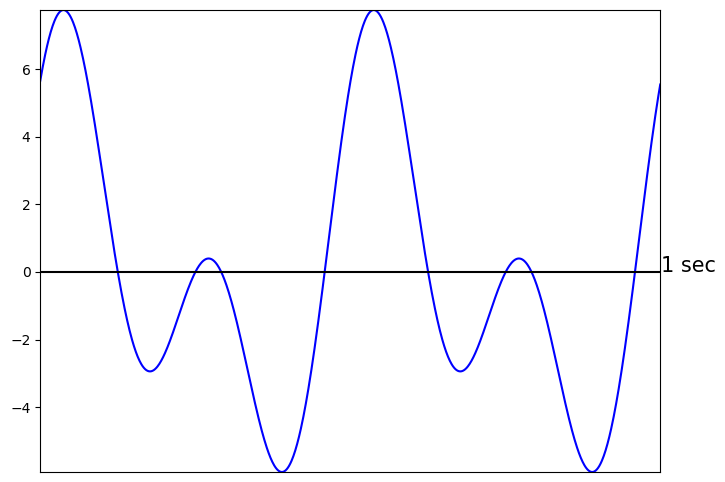

In [892]:
time = np.arange(0,1,0.001)
freq = 3

timeseries = 8 * np.sin(2*np.pi * freq * time + np.pi/4) * np.cos(2*np.pi * 1 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The plot shows the product of the 3 Hz sine wave and 1 Hz cosine wave. In terms fo magnitude, the waveform appears to be
symmetric about the x axis.

Calculate the cosine magnitude component.

In [893]:
from scipy.integrate import quad

def integrand(x):
    return 8 * np.sin(2*np.pi * freq * x + np.pi/4) * np.cos(2*np.pi * 1 * x)

b = quad(integrand, 0, 1)[0] / 0.5
round(b,5)

-0.0

Calculate the total magnitude of 1 Hz activity using $\sqrt{(sin^2 θ + cos^2 θ)}$ .

In [894]:
round(np.sqrt(a**2 + b**2))

0

In summary, both our sine 'probe' and our cosine 'probe' turned up nothing. So, there must be no activity at 1 Hz in the original signal.

Try 2 Hz probes.

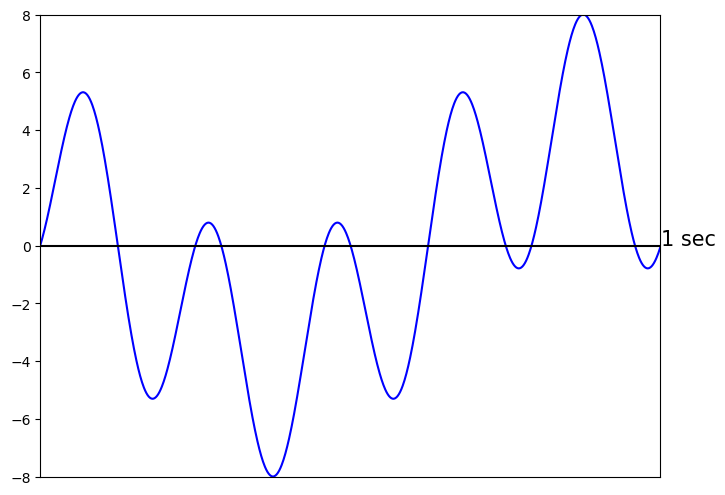

In [895]:
time = np.arange(0,1,0.001)
freq = 3

timeseries = 8 * np.sin(2*np.pi * freq * time + np.pi/4) * np.sin(2*np.pi * 2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The plot shows the product of the 3 Hz sine wave and a 'probe' 2 Hz sine wave. The waveform appears to be
symmetric about the x axis.

Calculate the sine component.

In [896]:
from scipy.integrate import quad

def integrand(x):
    return  8 * np.sin(2*np.pi * freq * x + np.pi/4) * np.sin(2*np.pi * 2 * x)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

0.0

Now multiply the timeseries by a 'probe' cosine 2 Hz function.

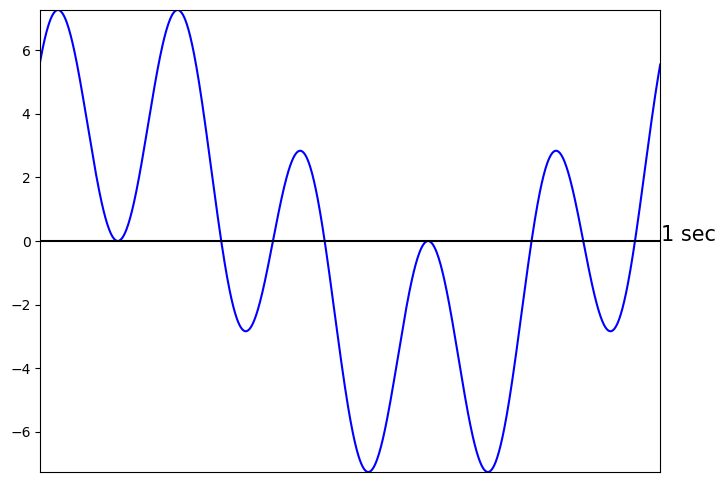

In [897]:
time = np.arange(0,1,0.001)
freq = 3

timeseries =  8 * np.sin(2*np.pi * freq * time + np.pi/4) * np.cos(2*np.pi * 2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The plot shows the product of the 3 Hz sine wave and a 'probe' 2 Hz cosine wave. The waveform appears to be
symmetric about the x axis.

Calculate the cosine magnitude component.

In [898]:
from scipy.integrate import quad

def integrand(x):
    return  8 * np.sin(2*np.pi * freq * x + np.pi/4) * np.cos(2*np.pi * 2 * x)

b = quad(integrand, 0, 1)[0] / 0.5
round(b,5)

-0.0

Calculate the total magnitude of 2 Hz activity using $\sqrt{(sin^2 θ + cos^2 θ)}$ .

In [899]:
round(np.sqrt(a**2 + b**2))

0

No activity at 2 Hz.

Try 3 Hz.

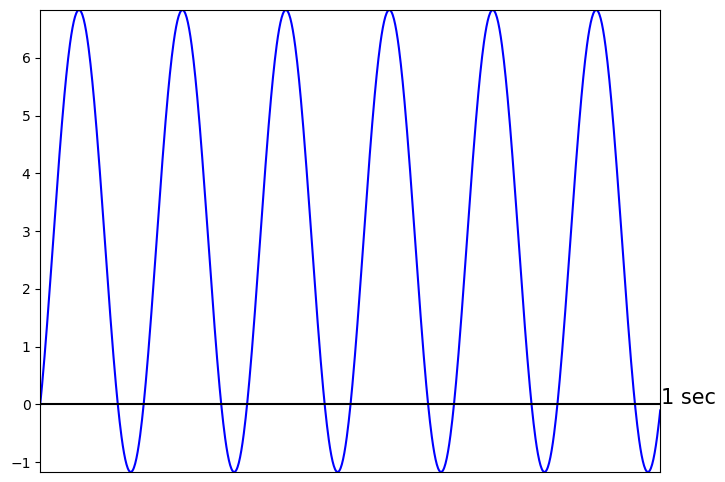

In [900]:
time = np.arange(0,1,0.001)
freq = 3

timeseries =  8 * np.sin(2*np.pi * freq * time + np.pi/4) * np.sin(2*np.pi * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The plot shows the product of the 3 Hz sine wave and a 'probe' 3 Hz sine wave.The waveform is clearly not
symmetric about the x axis.

Calculate the sine component.

In [901]:
from scipy.integrate import quad

def integrand(x):
    return   8 * np.sin(2*np.pi * freq * x + np.pi/4) * np.sin(2*np.pi * 3 * x)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

5.65685

Now multiply the timeseries by a 'probe' cosine 3 Hz function.

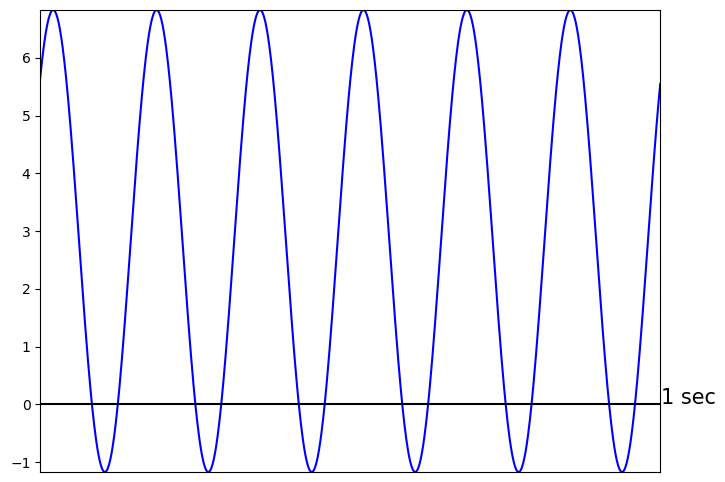

In [902]:
time = np.arange(0,1,0.001)
freq = 3

timeseries =  8 * np.sin(2*np.pi * freq * time + np.pi/4) * np.cos(2*np.pi * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The plot shows the product of the 3 Hz sine wave and the 'probe' 3 Hz cosine wave. The waveform is clearly not
symmetric about the x axis.

Calculate the cosine component.

In [903]:
from scipy.integrate import quad

def integrand(x):
    return   8 * np.sin(2*np.pi * freq * x + np.pi/4) * np.cos(2*np.pi * 3 * x)

b = quad(integrand, 0, 1)[0] / 0.5
round(b,5)

5.65685

Calculate the total magnitude of 3 Hz activity using $\sqrt{(sin^2 θ + cos^2 θ)}$ .

In [904]:
round(np.sqrt(a**2 + b**2))

8

We've struck gold - 8 units of activity at 3 Hz!

Now calculate the phase as ArcTan[ Cosinepart/Sinepart ] .

In [905]:
phaseradians = round(np.arctan(b/a),6)
phaseradians

0.785398

The phase is 0.785398 radians.

Don't like radians? Convert to degrees.

In [906]:
phasedegrees = round(phaseradians * 180 / np.pi,1)
phasedegrees

45.0

We could continue the search, but we already know there is no activity above 3 Hz, so take a rest.

### <font color=red>DSP.05.B2.b) Probing a Timeseries with Two Frequencies</font>

Take a timeseries that is the sum of two integer-frequency signals and use the above methods to find the frequencies (and their associated magnitudes) composing the timeseries. We will start with a timeseries with no phase offsets. 

Start by multiplying the observed timeseries by a 1 Hz 'probe' sine wave.

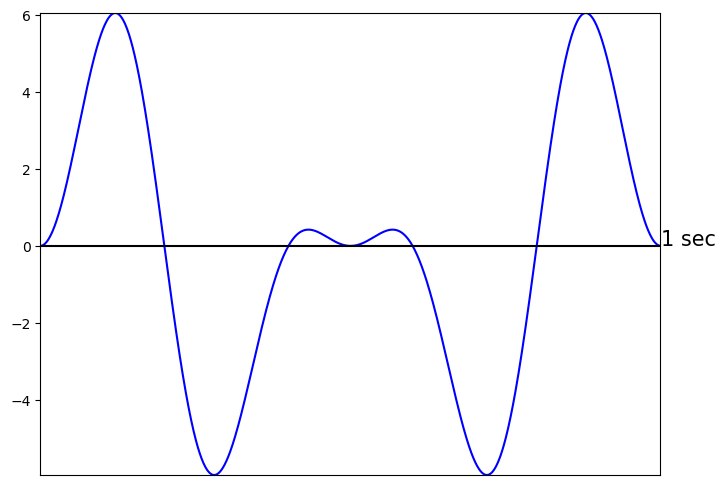

In [907]:
time = np.arange(0,1,0.001)
freq = 3
magnitude1 = 5
magnitude2 = 5
freq1 = 2
freq2 = 3

timeseries =  (magnitude1 * np.sin(2*np.pi * freq1 * time ) + 
             magnitude2 * np.sin(2*np.pi * freq2 * time )) * np.sin(2*np.pi * 1 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the sine part.

In [908]:
from scipy.integrate import quad

def integrand(x):
    return  (magnitude1 * np.sin(2*np.pi * freq1 * x ) + 
             magnitude2 * np.sin(2*np.pi * freq2 * x )) * np.sin(2*np.pi * 1 * x)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

0.0

Now multiply the timeseries by a 1 Hz 'probe' cosine wave.

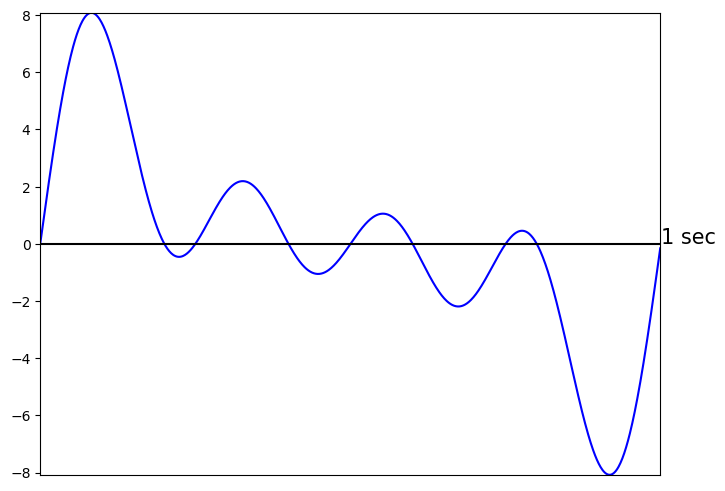

In [909]:
time = np.arange(0,1,0.001)
freq = 3
magnitude1 =5
magnitude2 =5
freq1 = 2
freq2 = 3

timeseries = (magnitude1 * np.sin(2*np.pi * freq1 * time ) + 
              magnitude2 * np.sin(2*np.pi * freq2 * time )) * np.cos(2*np.pi * 1 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the cosine part.

In [910]:
from scipy.integrate import quad

def integrand(x):
    return  (magnitude1 * np.sin(2*np.pi * freq1 * x ) + 
             magnitude2 * np.sin(2*np.pi * freq2 * x )) * np.cos(2*np.pi * 1 * x)

b = quad(integrand, 0, 1)[0] / 0.5
round(b,5)

-0.0

Calculate the total magnitude of 1 Hz activity using $\sqrt{(sin^2 θ + cos^2 θ)}$ .

In [911]:
round(np.sqrt(a**2 + b**2))

0

So, we've shown that there's no activity at 1 Hz.

Try 2 Hz.

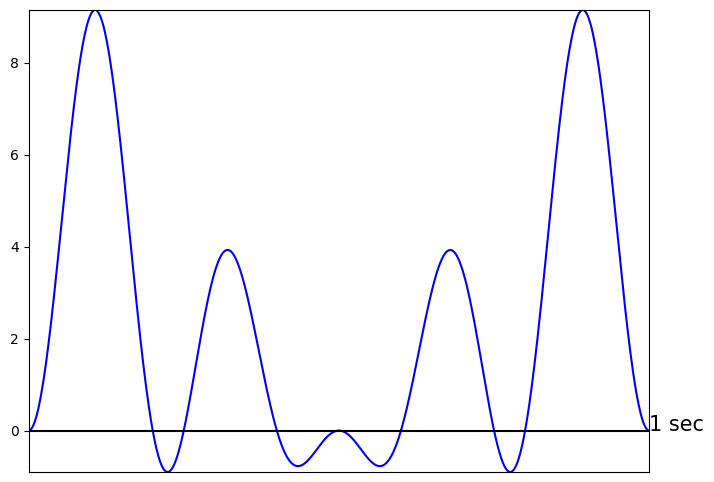

In [912]:
time = np.arange(0,1,0.001)

timeseries = (magnitude1 * np.sin(2*np.pi * freq1 * time ) + 
             magnitude2 * np.sin(2*np.pi * freq2 * time )) * np.sin(2*np.pi * 2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the sine part.

In [913]:
from scipy.integrate import quad

def integrand(x):
    return  (magnitude1 * np.sin(2*np.pi * freq1 * x ) + 
             magnitude2 * np.sin(2*np.pi * freq2 * x )) * np.sin(2*np.pi * 2 * x)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

5.0

Now multiply the timeseries by a 2 Hz 'probe' cosine wave.

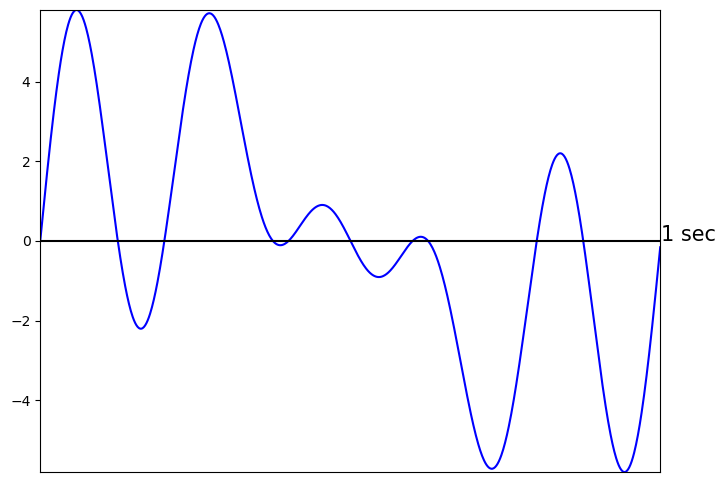

In [914]:
time = np.arange(0,1,0.001)

timeseries = (magnitude1 * np.sin(2*np.pi * freq1 * time ) + 
              magnitude2 * np.sin(2*np.pi * freq2 * time )) * np.cos(2*np.pi * 2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the cosine part.

In [915]:
from scipy.integrate import quad

def integrand(x):
    return  (magnitude1 * np.sin(2*np.pi * freq1 * x ) + 
             magnitude2 * np.sin(2*np.pi * freq2 * x )) * np.cos(2*np.pi * 2 * x)

b = quad(integrand, 0, 1)[0] / 0.5
round(b,5)

-0.0

Calculate the total magnitude of 2 Hz activity using $\sqrt{(sin^2 θ + cos^2 θ)}$ .

In [916]:
round(np.sqrt(a**2 + b**2))

5

There is activity at 2 Hz.

Try 3 Hz.

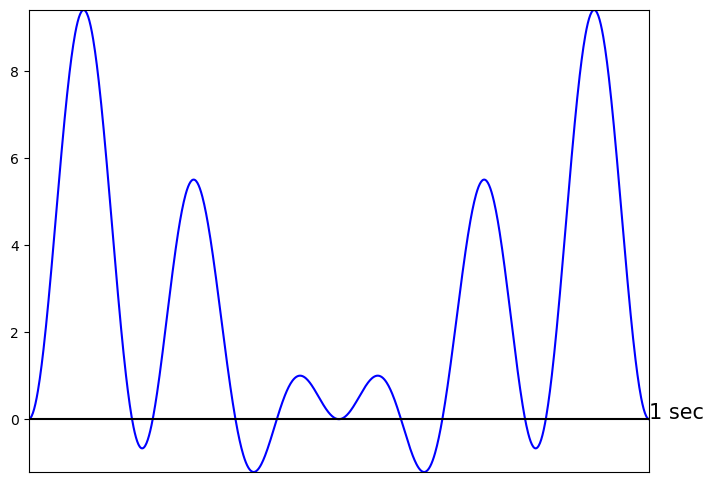

In [917]:
time = np.arange(0,1,0.001)

timeseries = (magnitude1 * np.sin(2*np.pi * freq1 * time ) + 
             magnitude2 * np.sin(2*np.pi * freq2 * time )) * np.sin(2*np.pi * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the sine part.

In [918]:
from scipy.integrate import quad

def integrand(x):
    return  (magnitude1 * np.sin(2*np.pi * freq1 * x ) + 
             magnitude2 * np.sin(2*np.pi * freq2 * x )) * np.sin(2*np.pi * 3 * x)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

5.0

Now multiply the timeseries by a 3 Hz 'probe' cosine wave.

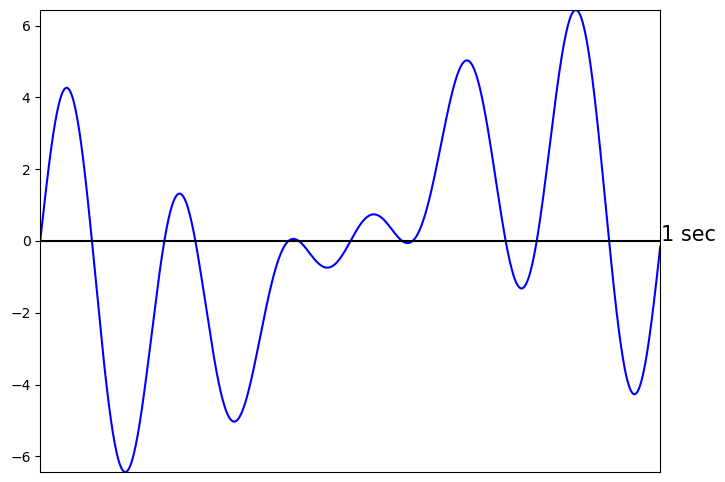

In [919]:
time = np.arange(0,1,0.001)
freq = 3
magnitude1 =5
magnitude2 =5
freq1 = 2
freq2 = 3

timeseries = (magnitude1 * np.sin(2*np.pi * freq1 * time ) + 
             magnitude2 * np.sin(2*np.pi * freq2 * time )) * np.cos(2*np.pi * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the cosine part.

In [920]:
from scipy.integrate import quad

def integrand(x):
    return  (magnitude1 * np.sin(2*np.pi * freq1 * x ) + 
             magnitude2 * np.sin(2*np.pi * freq2 * x )) * np.cos(2*np.pi * 3 * x)

b = quad(integrand, 0, 1)[0] / 0.5
round(b,5)

0.0

Calculate the total magnitude of 3 Hz activity using $\sqrt{(sin^2 θ + cos^2 θ)}$ .

In [921]:
round(np.sqrt(a**2 + b**2))

5

There is activity at 3 Hz.

Before going further, create a timeseries using the information already obtained and see how this
timeseries compares to the original timeseries with unknown values.

Here is the original timeseries.

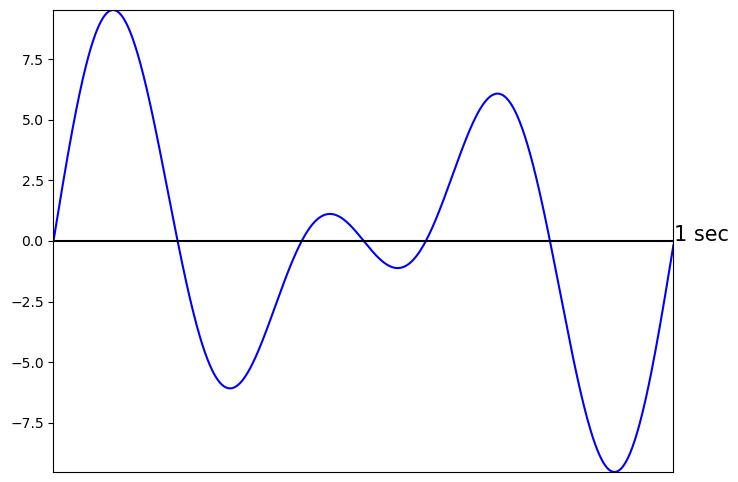

In [922]:
time = np.arange(0,1,0.001)

timeseries = magnitude1 * np.sin(2*np.pi * freq1 * time) + magnitude2 * np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Below is the timeseries created by summing a 2 Hz sine wave with magnitude 5, and a 3 Hz sine wave
with magnitude 5, with those values coming from the analysis we did. This plot shows the original and estimated timeseries together. (And remember, in this example we know there is no phase offset.)

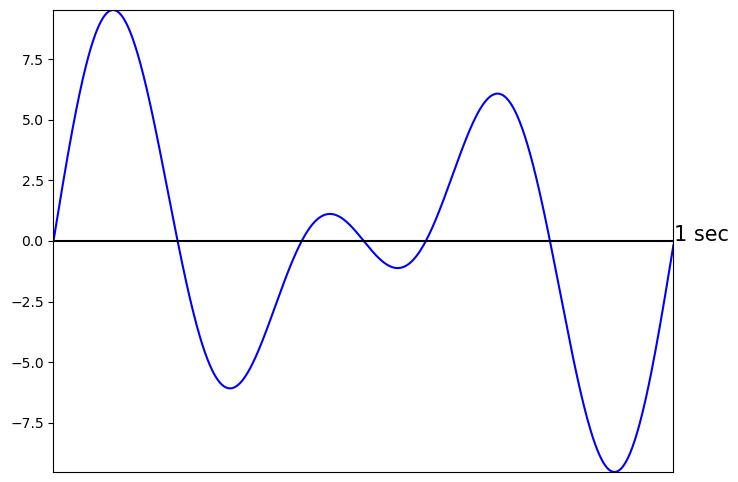

In [923]:
time = np.arange(0,1,0.001)
timeseries =5 * np.sin(2*np.pi * 2 * time) +5 * np.sin(2*np.pi * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Don't see two waveforms? That is because the two waveforms are exactly the same - sharing ink all the
way. The frequencies composing the original timeseries were correctly estimated.

## <font color=red>DSP.05.B3) Obtaining the Magnitude and Phase of a Timeseries Containing Two Sine Waves Using Complex Exponentials</font>

### <font color=red>DSP.05.B3.a) A Variation on a Theme</font>

In previous sections, a procedure was outlined to determine the frequency(ies) composing a timeseries
(as well as the associated magnitude and phase values). Below, we'll see that we can do the same more
easily if we use complex exponentials.

Recall Euler's identities:


 $e^{i x} = cos[x] + i sin[x]$
 
 $e^{-i x} = cos[x] - i sin[x]$

Using the Euler identities, sine and cosine functions can be expressed as complex exponentials (see
Lesson 2):

 $sin[x] = \frac{e^{i x}-e^{-i x}}{2 i}$
 
 $cos[x] = \frac{e^{i x}+e^{-i x}}{2}$

Repeat the procedures outlined above using sine and cosine functions expressed as complex exponentials.
Go back to one of the previous examples - a 3 Hz sine wave (amplitude = 8 units, phase shift = 45
degrees).

Instead of starting at 1 Hz, skip the uninteresting steps and multiply the observed timeseries with a sine
wave expressed as a complex exponential term (the exponential term is raised to a power of 3 to model
3 Hz activity, via the "3j" in the code, with j representing the square root of -1).

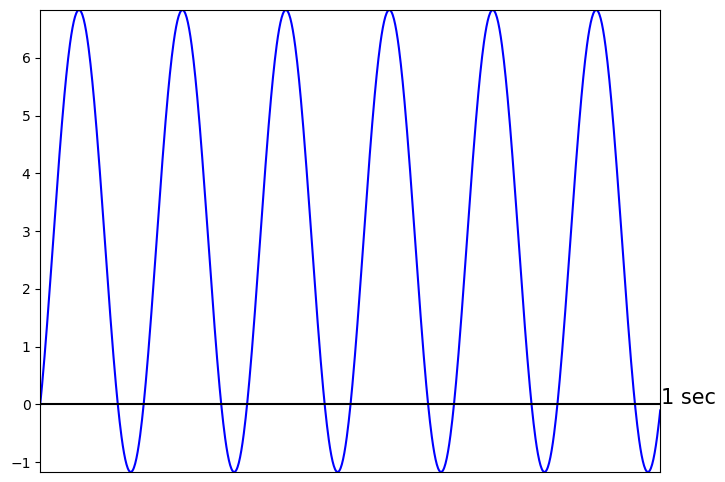

In [5]:
time = np.arange(0,1,0.001)
freq = 3
amp_sin = (np.exp(2*np.pi * 3j * time) - np.exp(-2*np.pi * 3j * time)) / (1j * 2)
timeseries =  8 * np.sin(2*np.pi * freq * time + np.pi/4 ) * amp_sin

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the sine part.

In [6]:
from scipy.integrate import quad

def integrand(x):
    return  8 * np.sin(2*np.pi * freq * x + np.pi/4 ) * (np.exp(2*np.pi * 3j * x) - np.exp(-2*np.pi * 3j * x)) / (1j * 2)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

5.65685

Now multiply the observed timeseries with a cosine wave expressed as a complex exponential term.

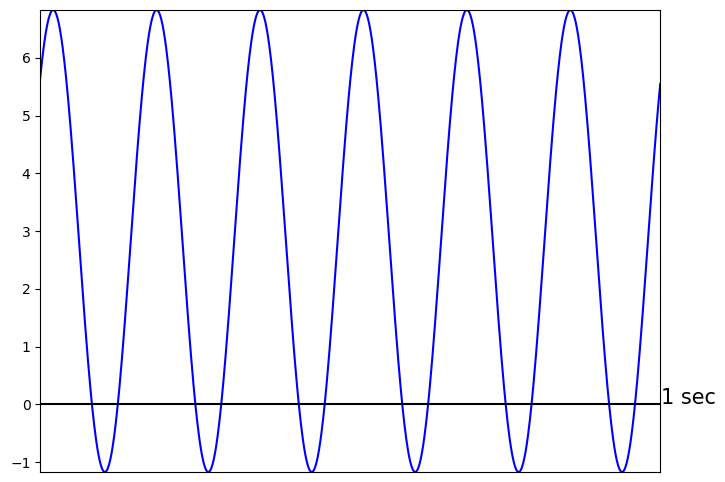

In [7]:
time = np.arange(0,1,0.001)
freq = 3
amp_sin = (np.exp(2*np.pi * 3j * time) + np.exp(-2*np.pi * 3j * time)) / 2
timeseries =  8 * np.sin(2*np.pi * freq * time + np.pi/4 ) * amp_sin

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the cosine part.

In [8]:
from scipy.integrate import quad

def integrand(x):
    return  8 * np.sin(2*np.pi * freq * x + np.pi/4 ) * (np.exp(2*np.pi * 3j * x) + np.exp(-2*np.pi * 3j * x)) / 2

b = quad(integrand, 0, 1)[0] / 0.5
round(b,5)

5.65685

Calculate the total magnitude of 3 Hz activity using $\sqrt{(sin^2 θ + cos^2 θ)}$ .

In [9]:
round(np.sqrt(a**2 + b**2))

8

8 units of activity at 3 Hz. As expected, complex exponentials provided the same results as the sine and
cosine functions.

Did this have to be the case?

Answer: Yes! Although the above complex exponential functions might seem odd or less intuitive, they are simply the sine and
cosine functions in disguise.

## <font color=red>DSP.05.B3.b) Taking Advantage of Some Nice Properties of Complex Exponentials</font>

Although using the sine and cosine complex exponential identities to probe the original timeseries for
activity at a specific frequency is pretty cool, there is a chance you might think that the use of complex
exponentials instead of the familiar sine and cosine functions is only of academic interest.

If so, think again!

Check this out. Instead of using the complex exponential sine and cosine identities, plug in $e^ {i ω x}$ where
ω is the frequency of interest.

Stay with the same example above and set $w$ = 3.

In [10]:
time = np.arange(0,1,0.001)
freq = 3
amp_complex = np.exp(2*np.pi * 3j * time) 
timeseries = 16 * np.sin(2*np.pi * freq * time + np.pi/4) * amp_complex

Before we create a plot, look at the product of 16 Sin[3 x + $π$/4 ] and $e^{i 3 x}$as a function of x for a few values.

In [11]:
timeseries[0:9]

array([11.3137085 +0.j        , 11.52289702+0.21722722j,
       11.72374957+0.44218445j, 11.91598073+0.67455201j,
       12.09931734+0.91399969j, 12.27349884+1.16018723j,
       12.43827774+1.41276478j, 12.59341986+1.67137341j,
       12.73870474+1.93564562j])

Each value is a complex number.

Quick, recall this Euler identity: $e^{i x} = cos[x] + i sin[x]$.
    
Euler's identity tells us that the real part of the complex number provides information about the cosine
component and that the imaginary part of the complex number provides information about the sine component.

Pay attention - here is a key concept!

Check this out. Take any number from the above output. In particular, randomly select the second complex number.

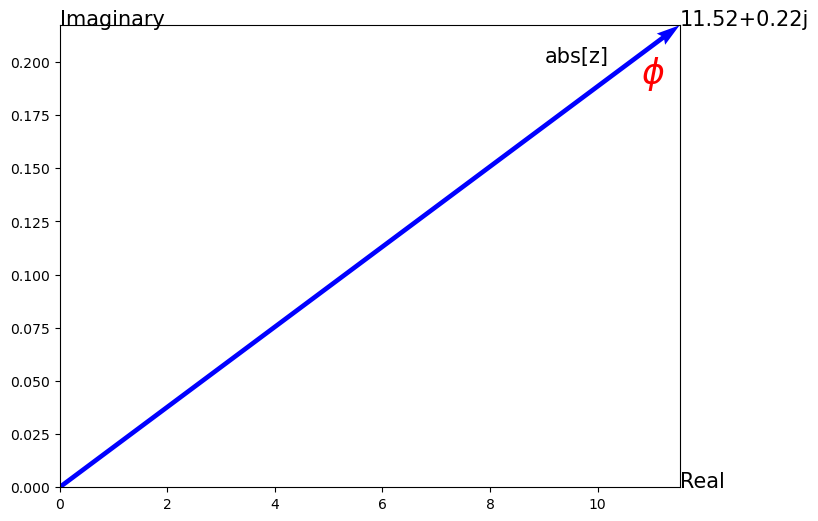

In [12]:
z = 11.52289702+0.21722722j
point_x = np.real(z)
point_y = np.imag(z)

plt.quiver(0, 0, point_x, point_y, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.xlim(0, point_x)
plt.ylim(0, point_y)
plt.text(point_x, point_y,'11.52+0.22j',fontsize=15)
plt.text(point_x,0,'Real',fontsize=15)
plt.text(0,point_y,'Imaginary',fontsize=15)
plt.text(point_x-2.5, 0.2,'abs[z]',fontsize=15)
plt.text(10.8,0.19,'$\phi$',fontsize=25,color='r')
plt.show()

In Lesson 2, we saw that the Pythagorean theorem shows us how to calculate the length of this vector
(for a complex number, this is often called the modulus).

In [13]:
length = round(np.sqrt(point_x**2 + point_y**2),5)
length

11.52494

This is the same as calculating the dot product.

In [14]:
X = [point_x, point_y];
length = round(np.sqrt(np.dot(X,X)),5)
length

11.52494

And compare with the Python 'abs' function. [#Miller Is this 11.52494 supposed to match the 11.52289702 in the timeseries vector just created? They're very close, not identical. If they're supposed to match, maybe we should say so here and say why they're not identical? (I don't know why not... maybe they're not supposed to match - just happen to be very close in this example?)]

In [15]:
round(abs(z),5)

11.52494

The above is the length of the vector (the modulus) for the random complex value we selected. 

Keeping this in mind, create a plot of the magnitude of the complex values obtained by
$(16 * Sin[3 x 2π + π/4 ]) e^{i 3 x 2π}$ as a function of x via plotting the absolute value of each complex value.

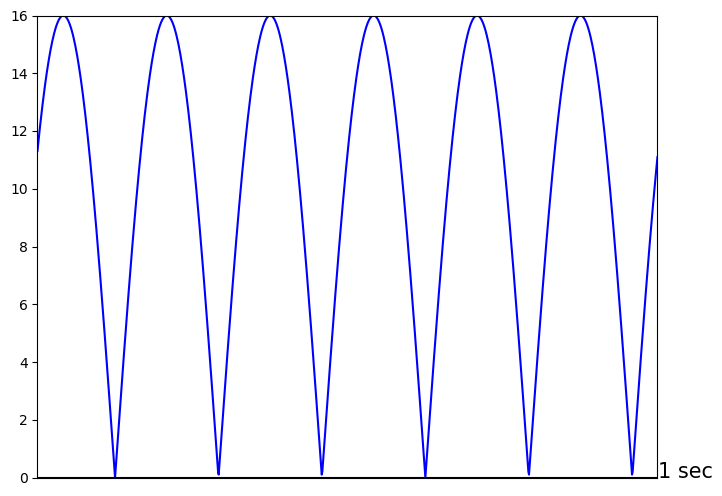

In [935]:
time = np.arange(0,1,0.001)
freq = 3
amp_complex = np.exp(2*np.pi * 3j * time) 
timeseries_complex = 16 * np.sin(2*np.pi * freq * time + np.pi/4 ) * amp_complex
timeseries = abs(timeseries_complex)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Look familiar? It should look just like the plot obtained by multiplying two 3 Hz sine waves (obtaining 6
peaks, all activity above the x axis). This is what the magnitude of the product 16 Sin[3 x 2π + $π$/4 ] and
$e^{i 3 x 2 $π$}$ calculates.

Integrate combined[x] and divide by 0.5 seconds to calculate the magnitude of 3 Hz activity.

In [936]:
spectrum = sum(timeseries_complex)*0.001/ 0.5
spectrum

(11.313708498984766+11.313708498984758j)

Again, a complex number! This complex number reflects the amount of 3 Hz activty measured by the sine and cosine compnents.  

Here is Euler's identity: $e^{i x} = cos[x] + i sin[x]$.

Euler's identity tells us that the real part of the complex number provides information about the cosine
component and that the imaginary part of the complex number provides information about the sine component.

As we saw above, there is not much to computing the magnitude - just use the abs function.

In [937]:
round(abs(spectrum),5)

16.0

The 'abs' function tells us that the magnitude of 3 Hz activity is 16.

It checks out.

## <font color=red>DSP.05.B3.c) Taking Advantage of Some Nice Properties of Complex Exponentials</font>

Look at another example. Set the gain to 20, the frequency to 8 Hz, and the phase offset to 60°.

Since the frequency is 8 Hz, set the frequency value (freq) $w$ = 8.

In [938]:
time = np.arange(0,1,0.001)
freq = 8
amp_complex = np.exp(2*np.pi * 8j * time)
timeseries = 20 * np.sin(2*np.pi * freq * time + np.pi/3 ) * amp_complex

Before we create a plot, look at the product of 20 Sin[8 x + $π$/3 ] and $e^{i 8 x}$as a function of x for a few values.

In [939]:
timeseries[0:9]

array([17.32050808+0.j        , 17.77859117+0.89440286j,
       18.14459761+1.8302639j , 18.41483147+2.79813283j,
       18.58656394+3.78823614j, 18.65806087+4.7905758j ,
       18.62860029+5.79503022j, 18.49847968+6.79145645j,
       18.269013  +7.76979261j])

Each value is a complex number.

Quick, recall Euler's identity: $e^{i x} = cos[x] + i sin[x]$.

Euler's identity tells us that the real part of the complex number provides information about the cosine
component and that the imaginary part of the complex number provides information about the sine component.

Pay attention! Here is where everything falls into place.

Take one of the complex numbers calculated above.

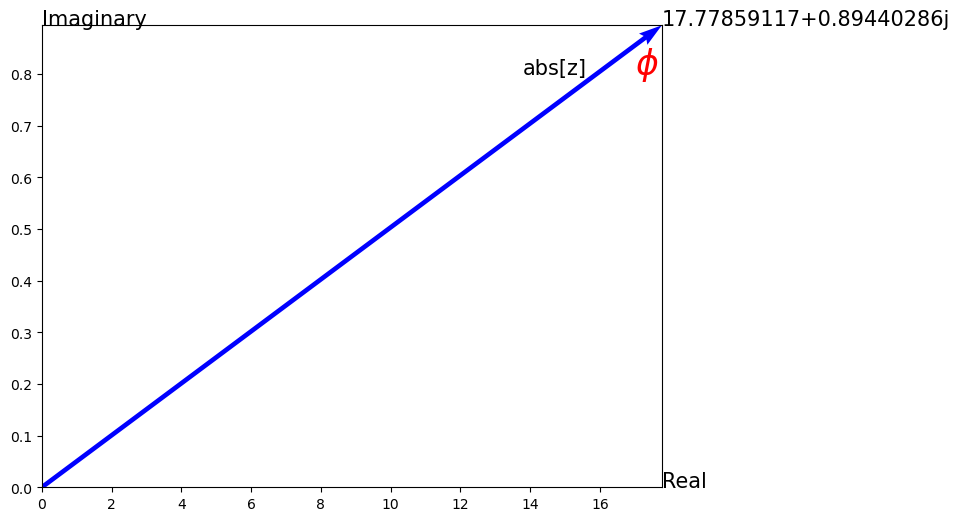

In [940]:
z = 17.77859117+0.89440286j
point_x = np.real(z)
point_y = np.imag(z)

plt.quiver(0, 0, point_x, point_y, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.xlim(0, point_x)
plt.ylim(0, point_y)
plt.text(point_x, point_y,'17.77859117+0.89440286j',fontsize=15)
plt.text(point_x,0,'Real',fontsize=15)
plt.text(0,point_y,'Imaginary',fontsize=15)
plt.text(point_x-4, 0.8,'abs[z]',fontsize=15)
plt.text(17,0.8,'$\phi$',fontsize=25,color='r')
plt.show()

Apply the Pythagorean theorem to calculate the modulus.

In [941]:
length = round(np.sqrt(point_x**2 + point_y**2),5)
length

17.80107

This is the same as calculating the dot product.

In [942]:
X = [point_x, point_y];
length = round(np.sqrt(np.dot(X,X)),5)
length

17.80107

Compare using the Python 'abs' function.

In [943]:
round(abs(z),5)

17.80107

Keep this in mind and create a plot of the magnitude of the complex values obtained by
$(20 * Sin[8 x 2π + π/3 ]) e^{i 8 x 2π}$ as a function of x via plotting the absolute value of each complex value.

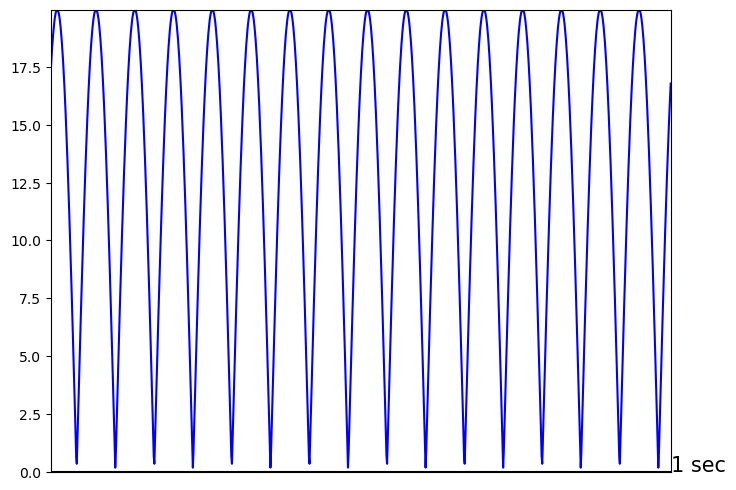

In [944]:
time = np.arange(0,1,0.001)
freq = 8
amp_complex = np.exp(2*np.pi * 8j * time) 
timeseries_complex = 20 * np.sin(2*np.pi * freq * time + np.pi/3 ) * amp_complex
timeseries = abs(timeseries_complex)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Look familiar? It looks just like the plot obtained by multiplying two 8 Hz sine waves (obtaining 16
peaks, all activity above the x axis). This is, in fact, what the magnitude of the product 20 * Sin[8 x 2 $π$ + $π$/3 ]
and $e^{i 8 x 2π}$ plots.

Just like before, integrate across combined[x] and divide by 0.5 seconds to compute the magnitude.

In [945]:
spectrum = sum(timeseries_complex)*0.001/ 0.5
spectrum

(17.320508075688796+10.000000000000016j)

Do not let this complex term bother you.

Here is Euler's identity: $e^{i x} = cos[x] + i sin[x]$.

Euler's identity tells us that the real part of the complex number provides information about the cosine
component and that the imaginary part of the complex number provides information about the sine component.

As we saw above, there is not much to computing the magnitude. Just use the abs function.

In [946]:
round(abs(spectrum),5)

20.0

The output of the 'Abs' command tells us that the magnitude of 8 Hz activity is 20.

## <font color=red>DSP.05.B3.d) Taking Advantage of Some Nice Properties of Complex Exponentials</font>

Stay with the example above. 

Computing the magnitude was easy. Is it also possible to obtain phase information?

Answer:
    
Computing the phase is no sweat.

Take the complex number computed above: 17.3205 + 10$i$. (Yes, fewer decimal places than above, just to keep it simple here.)
    
Here is a plot of that complex vector.

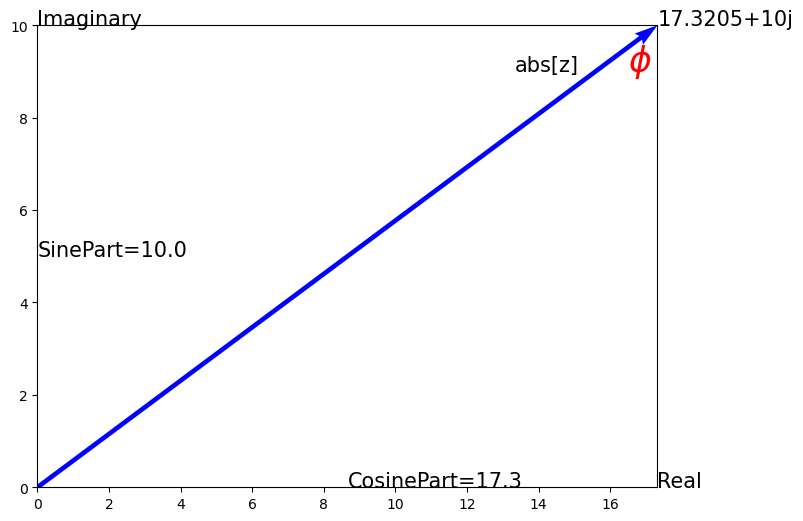

In [947]:
z = 17.3205+10j
point_x = np.real(z)
point_y = np.imag(z)

plt.quiver(0, 0, point_x, point_y, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.xlim(0, point_x)
plt.ylim(0, point_y)
plt.text(point_x, point_y,'17.3205+10j',fontsize=15)
plt.text(point_x,0,'Real',fontsize=15)
plt.text(0,point_y,'Imaginary',fontsize=15)
plt.text(point_x-4, 9,'abs[z]',fontsize=15)
plt.text(point_x/2,0,'CosinePart=17.3',fontsize=15)
plt.text(0,point_y/2,'SinePart=10.0',fontsize=15)
plt.text(16.5,9,'$\phi$',fontsize=25,color='r')
plt.show()

The arrow shows a vector created from the sinepart and cosinepart values - defined as {cosinepart,
sinepart}.

Take a look at this trigonometric identity: $A Cos x + B Sin x = \sqrt{A^2 + B^2} Sin (x + \frac{ArcTan A}{B})$ .
    
This tells us that our sinepart and cosinepart values can be expressed in terms of a sine wave with a
magnitude ($\sqrt{A^2 + B^2}$ ) with a phase offset of ArcTan (A/B). This phase value corresponds to the angle ϕ
in the above plot. Thus, computing the phase of the above timeseries is the same as computing the
angle ϕ that this vector forms with respect to the x axis, computed as ArcTan[ Cosinepart/Sinepart ]. The computed phase value is the phase you would add to a sine wave to get the correct phase offset.

Calculate ArcTan[ Cosinepart/Sinepart ] .

In [948]:
phaseradians = round(np.arctan(point_x/point_y),5)
phaseradians

1.0472

The phase is 1.0472 radians.

Don't like radians? Convert to degrees.

In [949]:
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

60.0

The original timeseries is 20 Sin[8 x 2π + π/3 ]

Yup - a 60° phase shift. (Recall that 2π is 360 degrees, so π/3 is 60 degrees.)

## <font color=red>DSP.05.B3.e) Taking Advantage of Some Nice Properties of Complex Exponentials</font>

Create a timeseries. Set the gain to 15, the frequency to 10 Hz, and the phase offset to 45°.

Multiply the timeseries by $e^{i 10 x 2π}$ and plot the magnitude values (the frequency is 10 Hz, so set the frequency (freq) ω = 10).

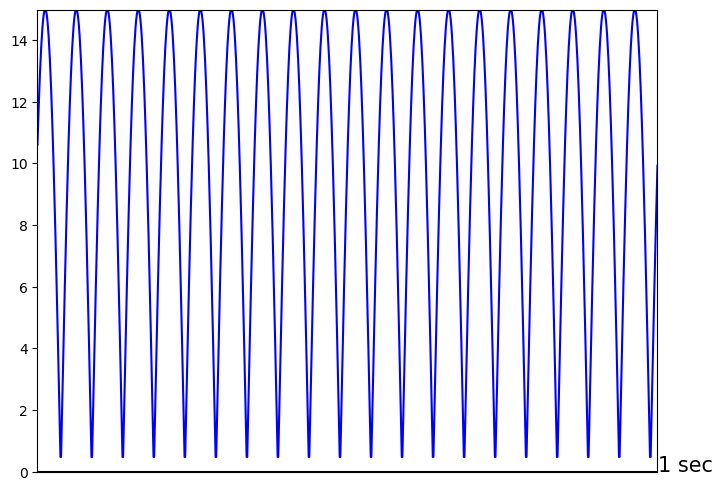

In [42]:
time = np.arange(0,1,0.001)
freq = 10
amp_complex = np.exp(2*np.pi * 10j * time) 
timeseries_complex = 15 * np.sin(2*np.pi * freq * time + np.pi/4 ) * amp_complex
timeseries = abs(timeseries_complex)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude and phase values. (As above, to compute the magnitude, we divide by 0.5 because dividing by 1 second would calculate mean activity, and here we want the magnitude.)

In [951]:
spectrum = sum(timeseries_complex)*0.001/ 0.5
spectrum

(10.606601717798199+10.606601717798224j)

In [952]:
round(abs(spectrum),5)

15.0

In [953]:
point_x = np.real(spectrum)
point_y = np.imag(spectrum)
phaseradians = round(np.arctan(point_x/point_y),5)
phaseradians

0.7854

In [954]:
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

45.0

The magnitude of 10 Hz activity is 15. The phase of 10 Hz activity is 45°.

Look above to see that, with a 45° phase, the activity is evenly split between the real and imaginary part (both = 10.606). This is consistent with the fact
that the vector created by plotting the complex number plots halfway between the x and y axes.

Pretty simple really.

## <font color=red>DSP.05.B3.f) Taking Advantage of Some Nice Properties of Complex Exponentials</font>

Create a timeseries, setting the gain to 3, the frequency to 15 Hz, and the phase offset to 30°.

Multiply the timeseries by $e^{i 15 x 2π}$ and plot the magnitude values (the frequency is 15 Hz, so set $w$ = 15).

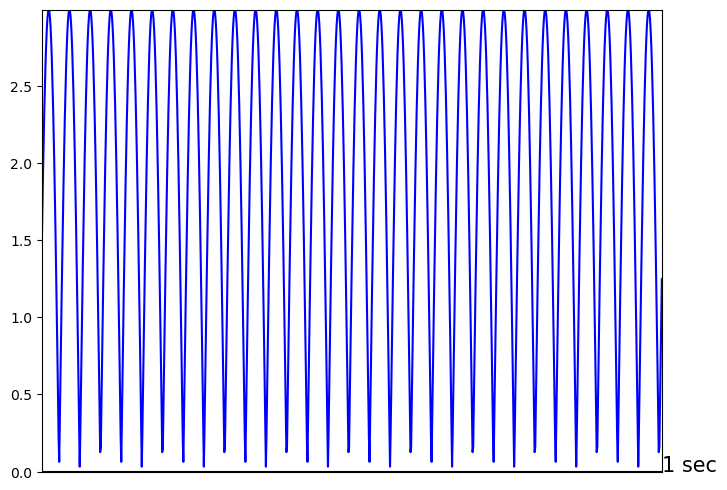

In [955]:
time = np.arange(0,1,0.001)
freq = 15
amp_complex = np.exp(2*np.pi * 15j * time) 
timeseries_complex = 3 * np.sin(2*np.pi * freq * time + np.pi/6 ) * amp_complex
timeseries = abs(timeseries_complex)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Compute the magnitude and phase of 15 Hz activity.

In [956]:
spectrum = sum(timeseries_complex)*0.001/ 0.5
spectrum

(1.5000000000000053+2.598076211353318j)

In [957]:
round(abs(spectrum),5)

3.0

In [958]:
point_x = np.real(spectrum)
point_y = np.imag(spectrum)
phaseradians = round(np.arctan(point_x/point_y),5)
phaseradians

0.5236

In [959]:
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

30.0

The output of the 'abs' function tells us that the magnitude of 15 Hz activity is 3.

The 'abs' function tells us that the phase of 15 Hz activity is 30°.

Here is a question. To compute the magnitude and phase, why did we use $e^{i 15 x}$ instead of $e^{-i 15 x}$ ?

Answer:
    
It doesn't matter. They provide the same magnitude and phase information.

MAGNITUDE:
    
$e^{i x}$ provides a complex number aCos + $i$ bSin.

$e^{-i x}$ provides a complex number aCos - $i$ bSin.

Because the real and imaginary terms are squared, when calculating magnitude the sign of the ⅈbSin
term does not matter.

PHASE:
    
$e^{i x}$ provides a complex number aCos + $i$bSin.

$e^{-i x}$ provides a complex number aCos - $i$bSin.

As previously noted, for $e^{ix}$ the phase is calculated as ArcTan[ Cosinepart/Sinepart ]. When using  $e^{-ix}$, our trigonometric identity is now: $A Cos x - B Sin x = \sqrt{A^2 + (-B)^2} Sin (x - ArcTan\frac{A}{B} )$.
    
Thus, to compute the correct phase offset value when using $e^{-ix}$, simply compute ArcTan-[ Cosinepart/Sinepart]. You would use the computed phase value to adjust a sine wave to get the correct phase offset.

??Edgar - ask Song


We will examine this issue again in the Chapter 5 GiveItaTry.

## <font color=red>DSP.05.B4) A Closer Look at Using Complex Exponentials to Compute Magnitude and Phase</font>

### <font color=red>DSP.05.B4.a) Using Complex Exponentials to Determine Magnitude and Phase</font>

Run the below code.

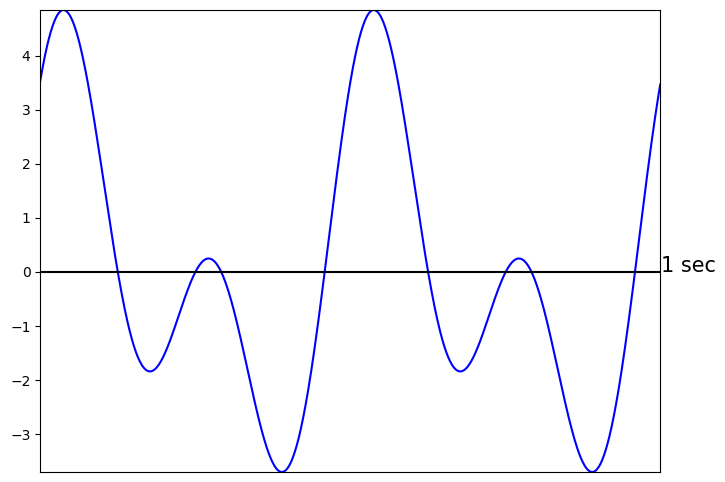

In [960]:
time = np.arange(0,1,0.001)
amp_complex = np.exp(2*np.pi * 1j * time) 
timeseries = unknownmag1 * np.sin(2*np.pi * unknownfreq1 * time + unknownphase1) * amp_complex

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Start with a timeseries composed of a single frequency of unknown magnitude and phase.

Multiply the timeseries with $e^{i ω x 2π}$ starting at $w$ =1, and then calculate the magnitude of 1 Hz activity.

In [961]:
spectrum = sum(timeseries)*0.001/ 0.5
round(spectrum,5)

-0j

The value is 0. This tells us there is no 1 Hz activity.

Set $w$ = 2.

In [962]:
amp_complex = np.exp(2*np.pi * 2j * time) 
timeseries = unknownmag1 * np.sin(2*np.pi * unknownfreq1 * time + unknownphase1) * amp_complex
spectrum = sum(timeseries)*0.001/ 0.5
round(spectrum,5)

(-0-0j)

The value is 0. This tells us there is no 2 Hz activity.

Set $w$ = 3.

In [963]:
amp_complex = np.exp(2*np.pi * 3j * time) 
timeseries = unknownmag1 * np.sin(2*np.pi * unknownfreq1 * time + unknownphase1) * amp_complex
spectrum = sum(timeseries)*0.001/ 0.5
round(spectrum,5)

(3.53553+3.53553j)

There is activity at 3 Hz. Compute the magnitude of the 3 Hz activity.

In [964]:
round(abs(spectrum),5)

5.0

Compute the phase of the 3 Hz activity.

In [965]:
point_x = np.real(spectrum)
point_y = np.imag(spectrum)
phaseradians = round(np.arctan(point_x/point_y),5)
phaseradians

0.7854

In [966]:
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

45.0

The magnitude of 3 Hz activity is 5. The phase of 3 Hz activity is 45°. Look above to see that, with a 45°
phase, the activity is evenly split between the real and imaginary part (both = 3.53553). This is consistent with the fact
that the vector created by plotting the complex number plots halfway between the x and y axes.

Take a look.

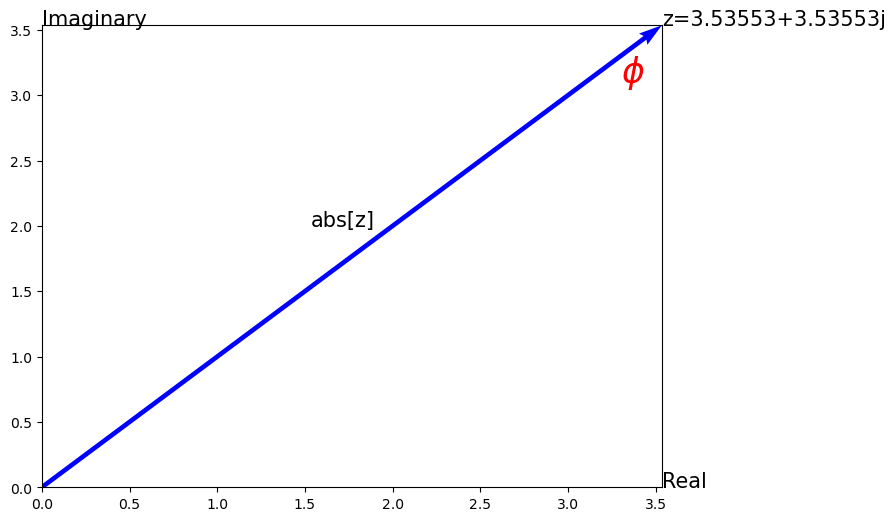

In [967]:
z = 3.53553+3.53553j
point_x = np.real(z)
point_y = np.imag(z)

plt.quiver(0, 0, point_x, point_y, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.xlim(0, point_x)
plt.ylim(0, point_y)
plt.text(point_x, point_y,'z=3.53553+3.53553j',fontsize=15)
plt.text(point_x,0,'Real',fontsize=15)
plt.text(0,point_y,'Imaginary',fontsize=15)
plt.text(point_x-2, 2.0,'abs[z]',fontsize=15)
plt.text(3.3,3.1,'$\phi$',fontsize=25,color='r')
plt.show()

### <font color=red>DSP.05.B4.b) Using Complex Exponentials to Determine Magnitude and Phase</font>

Here is a timeseries composed of a single frequency of unknown magnitude and phase.

Multiply the timeseries with $e^{i ω x 2π}$ starting at $w$ =1 and then calculate the average value.

In [968]:
time = np.arange(0,1,0.001)
amp_complex = np.exp(2*np.pi * 1j * time) 
timeseries = unknownmag2 * np.sin(2*np.pi * unknownfreq2 * time + unknownphase2) * amp_complex

spectrum = sum(timeseries)*0.001/ 0.5
round(spectrum,5)

(-0+0j)

The value is 0. This tells us there is no 1 Hz activity.

Set $w$ =2.

In [969]:
amp_complex = np.exp(2*np.pi * 2j * time) 
timeseries = unknownmag2 * np.sin(2*np.pi * unknownfreq2 * time + unknownphase2) * amp_complex
spectrum = sum(timeseries)*0.001/ 0.5
round(spectrum,5)

(5+0j)

Looks like there is activity at 2 Hz, but there is no imaginary term. What is going on?

Answer: Take a look. Compute the magnitude and phase of 2 Hz activity.

In [970]:
round(abs(spectrum),5)

5.0

In [971]:
point_x = np.real(spectrum)
point_y = np.imag(spectrum)
phaseradians = round(np.arctan(point_x/point_y),5)
phaseradians

1.5708

In [972]:
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

90.0

The magnitude of 2 Hz activity is 5. The phase of 2 Hz activity is 90°.

Take a look at Euler's identity: $e^{i x} = cos[x] + i sin[x]$.

The complex term above indicates that none of the 2 Hz activity is captured by the sine component.
This must mean that all 2 Hz activity is modeled by the cosine component. In turn, that must mean that the
complex vector plots directly along the x axis. (Remember: the cosine component provides the x-axis coordinate, and the sine component provides the y-axis coordinate.)

Take a look (expand the plot if needed).

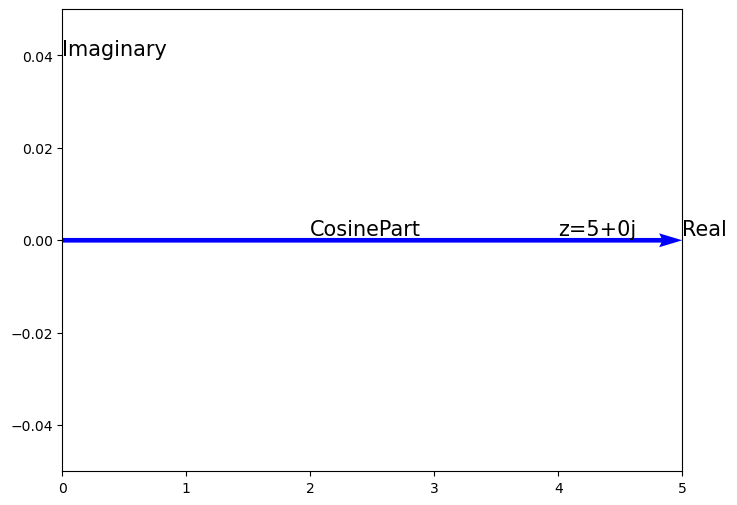

In [973]:
z = 5+0j
point_x = np.real(z)
point_y = np.imag(z)

plt.quiver(0, 0, point_x, point_y, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.xlim(0, point_x)
plt.ylim(0, point_y)
plt.text(4, 0.001,'z=5+0j',fontsize=15)
plt.text(point_x,0.001,'Real',fontsize=15)
plt.text(0,0.04,'Imaginary',fontsize=15)
plt.text(2, 0.001,'CosinePart',fontsize=15)
plt.show()

Yup - with a 90° phase offset, all activity is picked up by the cosine component. (Recall that phase offset is relative to the y axis, so a 90° phase offset means that we've tilted 90° clockwise from the y axis, putting us right on the x axis.)

### <font color=red>DSP.05.B4.c) Using Complex Exponentials to Determine Magnitude and Phase</font>

Here is a timeseries composed of a single frequency of unknown magnitude and phase.

Multiply the timeseries with $e^{i ω x 2π}$ starting at $w$ =1 and then calculate the average value.

In [974]:
time = np.arange(0,1,0.001)

amp_complex = np.exp(2*np.pi * 1j * time) 
timeseries = unknownmag3 * np.sin(2*np.pi * unknownfreq3 * time + unknownphase3) * amp_complex

spectrum = sum(timeseries)*0.001/ 0.5
round(spectrum,5)

(-0-0j)

The value is 0. This tells us there is no 1 Hz activity.

Set $w$ =2.

In [975]:
time = np.arange(0,1,0.001)

amp_complex = np.exp(2*np.pi * 2j * time) 
timeseries = unknownmag3 * np.sin(2*np.pi * unknownfreq3 * time + unknownphase3) * amp_complex

spectrum = sum(timeseries)*0.001/ 0.5
round(spectrum,5)

(-0-0j)

The value is 0. This tells us there is no 2 Hz activity.

Set $w$ = 3.

In [976]:
time = np.arange(0,1,0.001)

amp_complex = np.exp(2*np.pi * 3j * time) 
timeseries = unknownmag3 * np.sin(2*np.pi * unknownfreq3 * time + unknownphase3) * amp_complex

spectrum = sum(timeseries)*0.001/ 0.5
round(spectrum,5)

(-0-0j)

The value is 0. This tells us there is no 3 Hz activity.

Set $w$ = 4.

In [977]:
time = np.arange(0,1,0.001)

amp_complex = np.exp(2*np.pi * 4j * time) 
timeseries = unknownmag3 * np.sin(2*np.pi * unknownfreq3 * time + unknownphase3) * amp_complex

spectrum = sum(timeseries)*0.001/ 0.5
round(spectrum,5)

(-0+8j)

There is activity at 4 Hz, but the value of the real term is zero. What is going on?

Answer: Take a look. Compute the magnitude and phase of the 4 Hz activity.

In [978]:
round(abs(spectrum),5)

8.0

In [979]:
point_x = np.real(spectrum)
point_y = np.imag(spectrum)
phaseradians = round(np.arctan(point_x/point_y),5)
phaseradians

-0.0

In [980]:
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

-0.0

The magnitude of 4 Hz activity is 8. The phase of 3 Hz activity is 0 (= 360 degrees = 2π).

Take a look at Euler's identity: $e^{i x} = cos[x] + i sin[x]$.

The complex term computed above indicates that none of the 4 Hz activity is assessed by the cosine
component. This must mean that all 4 Hz activity in the timeseries is modeled by the sine component.
In turn, this must mean that the complex vector plots directly on the y axis. That should mean that the phase shift is 0°, right? Let's check that.

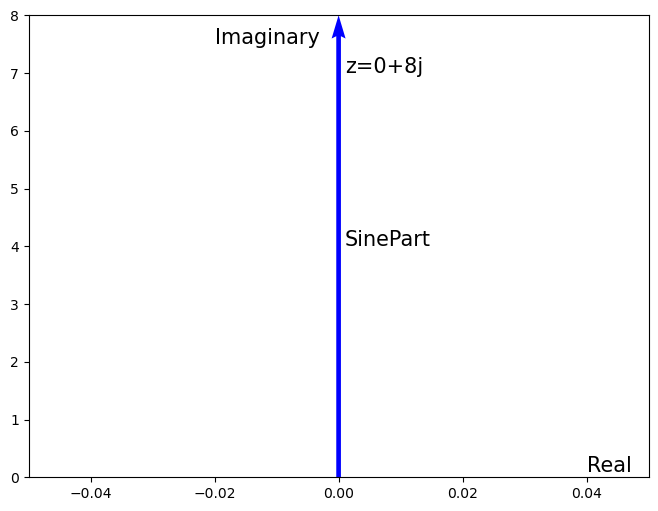

In [981]:
z = 0+8j
point_x = np.real(z)
point_y = np.imag(z)

plt.quiver(0, 0, point_x, point_y, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.xlim(0, point_x)
plt.ylim(0, point_y)
plt.text(0.001,7,'z=0+8j',fontsize=15)
plt.text(0.04,0.1,'Real',fontsize=15)
plt.text(-0.02,7.5,'Imaginary',fontsize=15)
plt.text(0.001, 4,'SinePart',fontsize=15)
plt.show()

Yup - with a 0° phase offset (in other words, no phase offset), all activity is picked up by the sine component. If we plotted the timeseries, we'd see that the sine-wave signal starts at 0 amplitude. Feel free to write code to show that.

## <font color=red>DSP.05.B5) Eigenstuff</font>

### <font color=red>DSP.05.B5.a) Sine and Cosine: Eigenvalues and Eigenfunctions</font>

Show how the magnitude of the timeseries 13 * Sin[4 x 2π + π/4 ] is computed using 'probe' sine and cosine
components. (The only frequency of interest is 4 Hz, so use just 4 Hz sine and cosine 'probes'.)

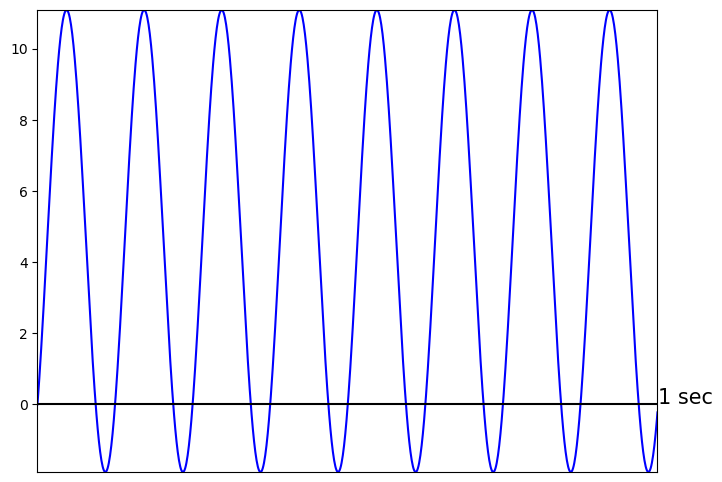

In [982]:
time = np.arange(0,1,0.001)
freq = 4
timeseries = 13 * np.sin(2*np.pi * freq * time + np.pi/4) * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of the sine component.

In [983]:
from scipy.integrate import quad

def integrand(x):
    return  13 * np.sin(2*np.pi * freq * x + np.pi/4) * np.sin(2*np.pi * freq * x)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

9.19239

Calculate the magnitude of the cosine component.

In [984]:
from scipy.integrate import quad

def integrand(x):
    return  13 * np.sin(2*np.pi * freq * x + np.pi/4) * np.cos(2*np.pi * freq * x)

b = quad(integrand, 0, 1)[0] / 0.5
round(b,5)

9.19239

Calculate the total magnitude.

In [985]:
round(np.sqrt(a**2 + b**2),5)

13.0

No problem.

Calculate the phase.

In [986]:
phaseradians = round(np.arctan(a/b),5)
phaseradians

0.7854

In [987]:
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

45.0

The magnitude and phase values tell us the modifications to Sin[4x×2π] that are needed to accurately
model 4 Hz activity in the original timeseries.

Specifically, multiply Sin[4x×2π] by 13 and then add a 45° phase offset: 13 Sin[4 x 2π + π/4 ] .

If you are in the know, then you know that the Sin[4x] term is called the eigenfunction (or eigenvector)
and that the sinepart and cosinepart are the eigenvalue. Multiplying the eigenfunction by the magnitude
value computed from the eigenvalue is the transform needed to model the 4 Hz energy present in the
original timeseries. Adding a phase offset computed from the eigenvalue is the transform needed to
correctly place the peaks and troughs of 4 Hz activity.

In sum, the eigenfunction and eigenvalue tell us how to transform Sin[x] to model 4 Hz activity in the
original timeseries.

### <font color=red>DSP.05.B5.b) How Do You Pronounce the Words "eigenvector" and "eigenvalue"?</font>

How do you pronounce the words "eigenvector" and "eigenvalue"?

Answer:
    
The words "eigenvector" and "eigenvalue" are adapted words. "Eigen" comes from German, "vector"
and "value" come from English. You pronounce "eigen" as if it were German and you pronounce
"vector" and "value" as usual.

In English, "Eigen" is pronounced "EYE - gen" with a hard g as in "garden" or "geezer," not the soft g as in "general" or
"genetics."

The German (and Dutch) word "eigen" corresponds to the English word "own."

### <font color=red>DSP.05.B5.c) Sine and Cosine: Invariance Under Translation</font>

Using sine and cosine functions, the magnitude of activity at a particular frequency can be obtained
regardless of the phase offset.

When sine waves are used to create the timeseries, and when there is no phase offset, then the sine component
captures all activity within a given frequency.

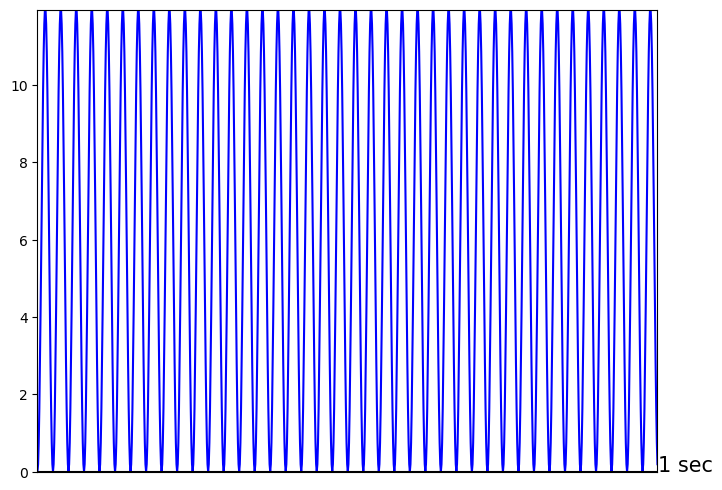

In [988]:
time = np.arange(0,1,0.001)
freq = 20
timeseries = 12 * np.sin(2*np.pi * freq * time) * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Because the two sine waves that are multiplied have the same frequency and phase, the mean is non-zero.
Integrate combined[x] and divide by 0.5 seconds to calculate the peak magnitude of 12 Hz activity
(dividing by 1 second would calculate mean activity).

In [989]:
from scipy.integrate import quad

def integrand(x):
    return  12 * np.sin(2*np.pi * freq * x) * np.sin(2*np.pi * freq * x)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

12.0

With a 90° phase offset, or an odd integer multiple of that, activity would be picked up by cosine[x] instead of sin[x].)
With some other phase offset that's not a multiple of 90, sine and cosine measures are both needed to obtain the total energy measure. 

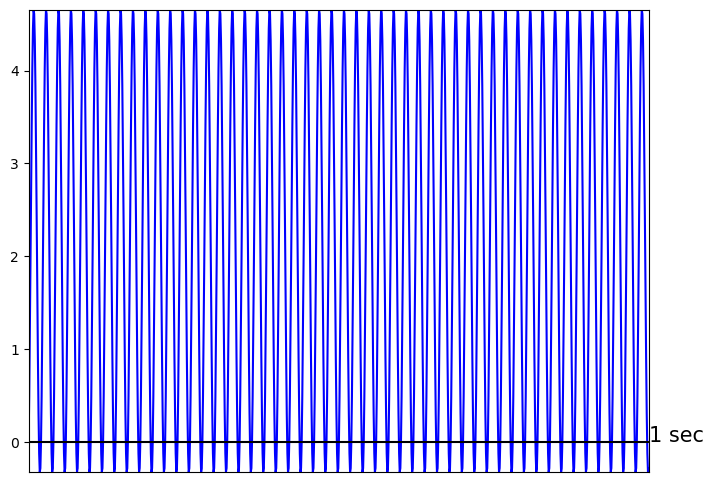

In [990]:
time = np.arange(0,1,0.001)
freq = 25
timeseries = 5 * np.sin(2*np.pi * freq * time + np.pi/6) * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of the sine component.

In [991]:
from scipy.integrate import quad

def integrand(x):
    return  5 * np.sin(2*np.pi * freq * x + np.pi/6) * np.sin(2*np.pi * freq * x)

a = quad(integrand, 0, 1)[0] / 0.5
round(a,5)

4.33013

Calculate the magnitude of the cosine component.

In [992]:
from scipy.integrate import quad

def integrand(x):
    return  5 * np.sin(2*np.pi * freq * x + np.pi/6) * np.cos(2*np.pi * freq * x)

b = quad(integrand, 0, 1)[0] / 0.5
round(b,5)

2.5

To obtain the magnitude value calculate $\sqrt{sinepart^2 + cosinepart^2} = \sqrt{sin^2 θ + cos^2 θ })$.

In [993]:
round(np.sqrt(a**2 + b**2),5)

5.0

The ability to use sine and cosine functions to obtain a measure of total energy at a given frequency, no
matter what the phase offset, is formally know as 'Invariance Under Translation'. Invariance under
translation simply means that sine and cosine functions are robust to any change in the starting point (in other words, the starting phase of the entire timeseries)
when computing the magnitude value.

### <font color=red>DSP.05.B5.d) Complex Exponentials: Eigenvalues and Eigenfunctions</font>

    
Show how the magnitude of the timeseries 13 Sin[4 x 2$π$ + $π$/3 ] is computed using a complex exponential
term. (The only frequency of interest is 4 Hz, so set $w$ = 4.)

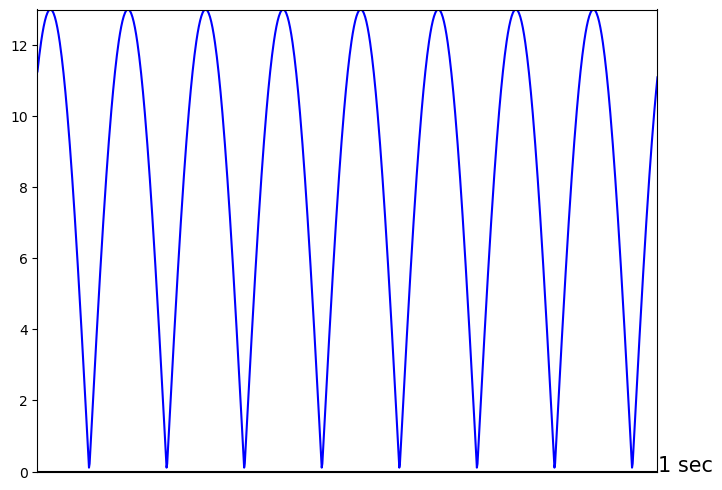

In [994]:
time = np.arange(0,1,0.001)
amp_complex = np.exp(2*np.pi * 4j * time) 
timeseries_complex = 13 * np.sin(2*np.pi * 4 * time + np.pi/3) * amp_complex
timeseries = abs(timeseries_complex)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude and phase values.

In [995]:
spectrum = sum(timeseries_complex)*0.001/ 0.5
round(spectrum,5)

(11.25833+6.5j)

In [996]:
round(abs(spectrum),5)

13.0

In [997]:
point_x = np.real(spectrum)
point_y = np.imag(spectrum)
phaseradians = round(np.arctan(point_x/point_y),5)
phaseradians

1.0472

In [998]:
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

60.0

The magnitude of 4 Hz activity is 13. The phase of 4 Hz activity is 60°. These are of course the same
values obtained using the sine and cosine functions. Recall what you learned above. What are the
complex exponential equivalents of the sine and cosine eigenfunctions and eigenvalues?

Answer:
    
Take a timeseries u(t + h), where if h = 0 the timeseries is not shifted and if h ≠ 0 the timeseries is shifted. (So, h represents phase.)

Using complex exponentials to model u(t + h) provides $e^{iω (t+h)} = e^{i ω h} e^{i ω t} = λ(ω) u(t)$ where λ(ω) is the
eigenvalue $λ(ω) =  e^ {i ω h}$ .

Thus, $e^{i ω t}$ is the eigenfunction.

The eigenvalue λ(ω) = $ e^{i ω h}$ contains the magnitude and phase information, calculated using Abs and
ArcTan. Thus, the eigenfunction $e^{i ω t}$ simply tells us what frequency is being modeled.

### <font color=red>DSP.05.B5.e) Eigenvalues and Eigenfunctions - Linear Independence</font>

Just a little extra information.

The sine and cosine eigenvectors (and their associated complex exponential equivalents) can be shown
to be linearly independent. Linear independence simply means that each eigenvector provides unique
information about the timeseries. Thus, for each timeseries, each $e^{jiπt}$ term provides unique information
(not redundant information).

R.W. Hamming (Digital Filtering: Third Edition, 1989) describes linear independence this way: "...we can say
that the eigenfunctions do not "feel" the presence of each other; each minds its own business regardless
of how much there may or may not be of the other eigenfunctions."
If a given timeseries is decomposed into a unique set of sine/cosine eigenvectors, how many eigenvectors
are needed to completely represent the timeseries?

Answer:
    
As is often the case, it all goes back to the Nyquist-Shannon sampling theorem:
    
The Nyquist-Shannon sampling theorem states that, for a timeseries to represent a continuous waveform
adequately, the sample rate (fs in samples per second) must be more than twice the fastest frequency
present in the original waveform. This requirement follows from the fact that only if samples are
obtained at least twice per cycle can a discrete timeseries accurately represent the frequency of a sine
wave. This axiom is referred to as Nyquist's Rule, and one-half the sampling frequency is referred to as
the Nyquist Frequency, which is the fastest frequency that the sampling frequency can represent
without distortion.

That the Nyquist Frequency is the fastest frequency that can be represented without distortion necessarily
sets the limit on the number of eigenvectors needed to completely represent the timeseries.
Although this sets the limit, it does not tell us how many eigenvectors are needed to accurately represent
the timeseries. This somewhat thorny issue will be examined in the Lesson 6.